In [2]:
# Library importation

# General data libraries
import pandas as pd
import numpy as np

# Basic
import operator
from pprint import pprint
import os
import json
from collections import Counter

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.cm as cm

import plotly.express as px

# Dataframe column views
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# ML
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

# Other
from collections import Counter
from numpy import where
import timeit

from csv import DictWriter

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
# Import of cleaning functions
from cleaning59 import na_rows_list, na_raw_drop_df, min_row_data_rate_list, min_row_data_rate_df, column_data_rate, column_data_rate_mean, columns_not_in_list, columns_delete_df, min_column_data_rate_df, low_outlier_filter_df, high_outlier_filter_df, dic_high_outlier_filter_df, word_column_filter_df, word_column_filter_lst, sign_invert_filter_df, common_elements, separate_elements 

In [15]:
# Import of graph functions
from plotting03 import bi_joint_plot

In [16]:
# Import of ML functions
from ML20 import OneHotEncoder, label_encoding_transform_with_merge, target_encoding_transform_with_merge, vector_encoding_transform_with_merge, encoding_transform_with_merge, kfold_classif

In [7]:
# Import feature engineering module from a Kaggle script

# importing sys
import sys
  
# adding 'loan_customer_scoring' to the system path
sys.path.append('scripts\\loan_customer_scoring\\')

from data_aggregation import*

# STUDY CASE CHOICE

In [8]:
smote = input("SMOTE re-sampling of the train part? (y/n)")

SMOTE re-sampling of the train part? (y/n) n


In [9]:
class_weigh = 'n'

In [10]:
rfe = input("Recursive feature selection? (y/n)")

Recursive feature selection? (y/n) n


In [11]:
# smote parameter 
if smote=='n':
    smote_case=1
    
if smote=='y':
    smote_case=2

In [12]:
# class weigh parameter 
if class_weigh=='n':
    class_weigh_case='.'
    
if class_weigh=='y':
    class_weigh_case='class_weigh_coefficient'

In [13]:
# rfe parameter 
if rfe == "y":
    rfe_case = "with_RFECV"
    
if rfe == "n":
    rfe_case = "without_RFECV"

# FOLDS

In [61]:
splits = input('If crossvalidation, choose the number of splits: (3/5)')
splits = int(splits)

If crossvalidation, choose the number of splits: (3/5) 3


In [62]:
# define evaluation
folds = KFold(n_splits=splits, shuffle=True, random_state=1)

# DATA AGGREGATION (KAGGLE SCRIPT)

In [16]:
df = main(part="train")

train samples: 307511
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 18s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 22s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 10s
Installments payments df shape: (339587, 26)
Process installments payments - done in 21s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 18s


In [17]:
df.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_

In [18]:
df.shape

(307507, 797)

In [19]:
df.dtypes.value_counts()

float64    621
uint8      133
int64       43
dtype: int64

In [20]:
# Filling rate by column
column_data_rate(df)

SK_ID_CURR                          1.000000
TARGET                              1.000000
CODE_GENDER                         1.000000
FLAG_OWN_CAR                        1.000000
FLAG_OWN_REALTY                     1.000000
                                      ...   
CC_NAME_CONTRACT_STATUS_nan_MAX     0.282611
CC_NAME_CONTRACT_STATUS_nan_MEAN    0.282611
CC_NAME_CONTRACT_STATUS_nan_SUM     0.282611
CC_NAME_CONTRACT_STATUS_nan_VAR     0.280556
CC_COUNT                            0.282611
Length: 797, dtype: float64

In [21]:
# Mean filling rate by column
column_data_rate_mean(df)

0.7407265762317369

# DATA CLEANING

In [22]:
# Check of infinite values

print("Infinite values detected: ")

for variable in df.columns:
    if len(np.isinf(df[variable]).value_counts())>1:
        print(f"\n{variable}")
        print(np.isinf(df[variable]).value_counts().iloc[1])
    else:
        None

Infinite values detected: 

PREV_APP_CREDIT_PERC_MAX
1

REFUSED_APP_CREDIT_PERC_MAX
1

INSTAL_PAYMENT_PERC_MAX
18


In [23]:
# Replacing infinte values by NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# IMPUTATION

In [24]:
# Imputation

median_imputation_train = {}
zero_imputation_train = {}

for variable in df.columns:
    if df[variable].notna().mean() >= 0.65:
        median_value = df[variable].median()
        df.loc[df[variable].isna(), variable] = median_value
        
        # saving in a dictionnary
        median_imputation_train[variable] = median_value
        
        # saving in a json file
        tf = open("projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\dictionary_median_imputation_train.json", "w")
        json.dump(median_imputation_train,tf)
        tf.close()
        
    else:
        df.loc[df[variable].isna(), variable] = 0
        
        # saving in a dictionnary
        zero_imputation_train[variable] = 0
        
        # saving in a json file
        tf = open("projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\dictionary_zero_imputation_train.json", "w")
        json.dump(zero_imputation_train,tf)
        tf.close()

In [25]:
len(median_imputation_train)

550

In [26]:
len(zero_imputation_train)

247

In [27]:
# Filling rate by column
column_data_rate_mean(df)

1.0

# TRAIN/VALIDATION SPLIT

In [28]:
# Defining the target
y = df['TARGET']

In [29]:
# Train/test split
df_train, df_val, y_train, y_val = \
	train_test_split(df, y,
                     test_size=0.3 # 30% of data for validation
                    ,random_state=1)

In [30]:
# Adding back the target
df_train['TARGET'] = y_train
df_val['TARGET'] = y_val

In [31]:
# Saving to csv 
returnValue = df_train.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\df_train.csv',sep = ',', index=False)
print(returnValue)

None


In [32]:
# Saving to csv 
returnValue = df_val.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\df_val.csv',sep = ',', index=False)
print(returnValue)

None


# FEATURE SELECTION (case)

## FEATURE SELECTION N°1 (case)

### Data reading

In [33]:
if rfe == "y":

    # Data reading with path information (train)
    df_train = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\df_train.csv',sep=',')

    # Data reading with path information (train)
    df_val = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\df_val.csv',sep=',')
    

In [34]:
if (rfe=="y"):

    # Defining the target depending on the case
    y_train = df_train['TARGET']
    y_val = df_val['TARGET']
    
    df_train.drop(['TARGET'], axis=1, inplace=True)
    df_val.drop(['TARGET'], axis=1, inplace=True)

In [35]:
if (rfe=="y"):
    
    # keeping loan ID
    z_train = df_train['SK_ID_CURR']
    z_val = df_val['SK_ID_CURR'] 

In [36]:
if (rfe=="y"):
    # Create arrays and dataframes to store results
    feats = [f for f in df_train.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

    # Modification of columns
    df_train = df_train[feats]
    df_val = df_val[feats]
    df_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_train.columns]
    df_val.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_val.columns]

### Standardization

In [ ]:
if rfe == "y":

    # Data standardization
    std_scale = preprocessing.StandardScaler().fit(df_train)

    X_train_std = std_scale.transform(df_train)
    X_val_std = std_scale.transform(df_val)
    
    df_train_std = pd.DataFrame(X_train_std, columns=df_train.columns)
    df_val_std = pd.DataFrame(X_val_std, columns=df_val.columns)

In [20]:
if (rfe=="y")&(smote=="n")&(class_weigh=="y"):
    
    ### Class weigh
    # Positive Binary Scaling
    pos = df_train_std[df_train_std['TARGET']==1].shape[0]
    neg = df_train_std[df_train_std['TARGET']==0].shape[0]
    # https://sites.google.com/view/lauraepp/parameters
    # Multiplication applied to every positive label weight.
    #By performing a weight multiplication on the positive label, the model is performing a cost-sensitive training.
    #The cost-sensitive training is applied to the booster model which impacts directly the trained models.
    #It implies a potential higher performance, especially when it comes to ranking tasks such as for AUC.
    pos_weigh_coef = neg/pos
    
else:
    pos_weigh_coef = None

### Feature selection

In [21]:
if rfe == "y":  
    
    # Calculation of features importance on the train part (SMOTE parameter taken into account)
    
    # config
    custom_loss='y'
    fbeta=False
    fbeta_number=0
    
    # LightGBM instance
    classifier = LGBMClassifier(
    objective='binary',
    scale_pos_weight=pos_weigh_coef,
    n_estimators=10000, # trees to build
    learning_rate=0.01, # Multiplication performed on each boosting iteration
    max_depth=10, # Maximum tree depth for base learners, <=0 means no limit
    num_leaves = 32, # num_leaves = 2^(max_depth)
    colsample_bytree = 0.2, # Percentage of columns used per iteration
    subsample = 0.9, # (bagging_fraction) you can specify the percentage of rows used per tree building iteration
    min_child_weight = 100,
    random_state=1234)

    gbm_clf_ter, gbm_clf_ter_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                                    folds,
                                                                                                                                    df_train_std,
                                                                                                                                    y_train,
                                                                                                                                    df_val_std,
                                                                                                                                    y_val,
                                                                                                                                    custom_loss,
                                                                                                                                    fbeta,
                                                                                                                                    fbeta_number,
                                                                                                                                    logistic_regression=False,
                                                                                                                                    train_resampling=smote,
                                                                                                                                    eval_set=True,
                                                                                                                                    scorer='auc',
                                                                                                                                    early_stopping_rounds=500,
                                                                                                                                    verbose=200)
                                                                                                                                     
    feat_importance = gbm_clf_ter_importance_df
    
    
    

Fold  1, original distribution: 
Counter({0: 131921, 1: 11581})
Fold  1, re-sampled distribution: 
Counter({0: 131921, 1: 131921})


C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.975077	training's binary_logloss: 0.273751	valid_1's auc: 0.711414	valid_1's binary_logloss: 0.3404
[400]	training's auc: 0.977851	training's binary_logloss: 0.181438	valid_1's auc: 0.733774	valid_1's binary_logloss: 0.273839
[600]	training's auc: 0.98016	training's binary_logloss: 0.152305	valid_1's auc: 0.752594	valid_1's binary_logloss: 0.255613
[800]	training's auc: 0.981733	training's binary_logloss: 0.140018	valid_1's auc: 0.763186	valid_1's binary_logloss: 0.248602
[1000]	training's auc: 0.982943	training's binary_logloss: 0.133412	valid_1's auc: 0.76976	valid_1's binary_logloss: 0.245134
[1200]	training's auc: 0.983969	training's binary_logloss: 0.129088	valid_1's auc: 0.774049	valid_1's binary_logloss: 0.243167
[1400]	training's auc: 0.984855	training's binary_logloss: 0.125847	valid_1's auc: 0.777052	valid_1's binary_logloss: 0.241855
[1600]	training's auc: 0.985654	training's binary_logloss: 0.123258	valid_1's auc: 0.779223	valid_1's binary_logloss: 0

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.974952	training's binary_logloss: 0.272308	valid_1's auc: 0.710521	valid_1's binary_logloss: 0.338588
[400]	training's auc: 0.977892	training's binary_logloss: 0.182111	valid_1's auc: 0.735359	valid_1's binary_logloss: 0.27285
[600]	training's auc: 0.980129	training's binary_logloss: 0.152378	valid_1's auc: 0.753579	valid_1's binary_logloss: 0.254375
[800]	training's auc: 0.981689	training's binary_logloss: 0.140324	valid_1's auc: 0.764688	valid_1's binary_logloss: 0.247332
[1000]	training's auc: 0.982878	training's binary_logloss: 0.133911	valid_1's auc: 0.771113	valid_1's binary_logloss: 0.243978
[1200]	training's auc: 0.983881	training's binary_logloss: 0.129626	valid_1's auc: 0.775578	valid_1's binary_logloss: 0.241976
[1400]	training's auc: 0.984774	training's binary_logloss: 0.126442	valid_1's auc: 0.778645	valid_1's binary_logloss: 0.240695
[1600]	training's auc: 0.985565	training's binary_logloss: 0.123784	valid_1's auc: 0.780809	valid_1's binary_logloss

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.975152	training's binary_logloss: 0.272806	valid_1's auc: 0.704498	valid_1's binary_logloss: 0.340093
[400]	training's auc: 0.978	training's binary_logloss: 0.180988	valid_1's auc: 0.729859	valid_1's binary_logloss: 0.274005
[600]	training's auc: 0.980156	training's binary_logloss: 0.151978	valid_1's auc: 0.748887	valid_1's binary_logloss: 0.255877
[800]	training's auc: 0.981709	training's binary_logloss: 0.13967	valid_1's auc: 0.760265	valid_1's binary_logloss: 0.24879
[1000]	training's auc: 0.982919	training's binary_logloss: 0.133354	valid_1's auc: 0.767343	valid_1's binary_logloss: 0.245293
[1200]	training's auc: 0.983927	training's binary_logloss: 0.129052	valid_1's auc: 0.771647	valid_1's binary_logloss: 0.243324
[1400]	training's auc: 0.984813	training's binary_logloss: 0.12584	valid_1's auc: 0.774791	valid_1's binary_logloss: 0.242013
[1600]	training's auc: 0.9856	training's binary_logloss: 0.123289	valid_1's auc: 0.776904	valid_1's binary_logloss: 0.241

In [22]:
if rfe == "y":

    # Display/plot feature importance
    def display_importances(feature_importance_df_, path): 
        cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
        best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
        plt.figure(figsize=(8, 10))
        sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False), color='#1976D2')
        plt.title('LightGBM Features (avg over folds)')
        plt.tight_layout()
        plt.savefig(path, transparent=True)

        return best_features

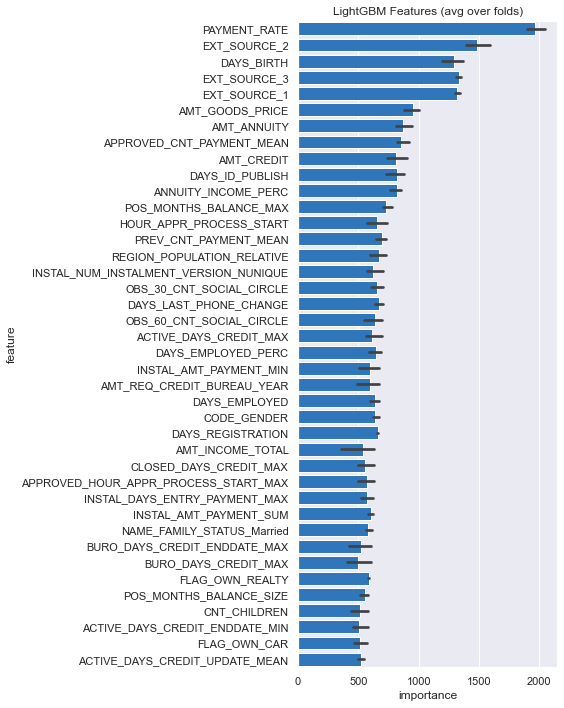

In [23]:
if rfe == "y":

    # Collecting the best features
    path = f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\first_feature_selection_lightGBM.png'
    best_features_df = display_importances(feat_importance, path)
    

In [24]:
if rfe == "y":

    # Sorting the best features
    best_features_df_grouped = best_features_df[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40]
    best_features_df_grouped.reset_index(inplace=True)
    best_features_df_grouped
    

### Inverse standardization transform

In [25]:
if rfe == "y":

    # Inverse transform (train)
    X_train = std_scale.inverse_transform(df_train_std)
    
    # Inverse transform (val)
    X_val = std_scale.inverse_transform(df_val_std)
    

In [26]:
if rfe == "y":

    # Creating a new train dataframe 
    df_train = pd.DataFrame(X_train, columns=df_train_std.columns)
    
    # Creating a new train dataframe 
    df_val = pd.DataFrame(X_val, columns=df_val_std.columns)


### Number of features parameter

In [27]:
if rfe == "y":

    # Defining the number of features to use with RFECV
    features_num = input("Select an arbitrary number of features: ")
    features_num = int(features_num)

Select an arbitrary number of features:  40


In [28]:
if rfe == "y":

    # Defining a list
    feature_list = list(best_features_df_grouped['feature'][0:features_num])
    feature_list

### Data filtering

In [29]:
if rfe == "y":

    # Filtering the dataframe with selected features (train)
    df_train_filtered = df_train[feature_list]
    df_train_filtered 

In [30]:
if rfe == "y":

    # Filling rate by column
    column_data_rate(df_train_filtered)
    

In [31]:
if rfe == "y":

    # Filtering validation data as well, without SMOTE sampling to avoid data leakage
    # Filtering the dataframe with selected features
    df_val_filtered = df_val[feature_list]


## FEATURE SELECTION N°2 WITH RFE (case)

### Standardization

In [32]:
if rfe == "y":

    # Data standardization
    std_scale = preprocessing.StandardScaler().fit(df_train_filtered)

    X_train_filtered_std = std_scale.transform(df_train_filtered)
    X_val_filtered_std = std_scale.transform(df_val_filtered)
    
    df_train_filtered_std = pd.DataFrame(X_train_filtered_std, columns=df_train_filtered.columns)
    df_val_filtered_std = pd.DataFrame(X_val_filtered_std, columns=df_val_filtered.columns)

### Feature selection RFE (case)

In [57]:
if rfe == "y":
    # LightGBM instance
    classifier = LGBMClassifier(
    objective='binary',
    n_estimators=10000, # trees to build
    learning_rate=0.01, # Multiplication performed on each boosting iteration
    max_depth=10, # Maximum tree depth for base learners, <=0 means no limit
    num_leaves = 32, # num_leaves = 2^(max_depth)
    colsample_bytree = 0.2, # Percentage of columns used per iteration
    subsample = 0.9, # (bagging_fraction) you can specify the percentage of rows used per tree building iteration
    min_child_weight = 100,
    random_state=1234,
    #eval_set=[(df_train_std_filtered_RFECV, y_train), (df_val_std_filtered_RFECV, y_val)],
    #early_stopping_rounds=200
    )
    

#### Function


-----------------------------------------------------
Fold  1, original distribution: 
Counter({0: 131921, 1: 11581})
Fold  1, re-sampled distribution: 
Counter({0: 131921, 1: 131921})

Features:2
Column: 0, Selected False, Rank: 9.000
Column: 1, Selected False, Rank: 13.000
Column: 2, Selected False, Rank: 20.000
Column: 3, Selected False, Rank: 32.000
Column: 4, Selected False, Rank: 7.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected False, Rank: 21.000
Column: 7, Selected False, Rank: 16.000
Column: 8, Selected False, Rank: 17.000
Column: 9, Selected False, Rank: 23.000
Column: 10, Selected False, Rank: 33.000
Column: 11, Selected False, Rank: 18.000
Column: 12, Selected False, Rank: 14.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 8.000
Column: 15, Selected False, Rank: 12.000
Column: 16, Selected False, Rank: 19.000
Column: 17, Selected False, Rank: 2.000
Column: 18, Selected False, Rank: 36.000
Column: 19, Selected False, Rank: 10.000

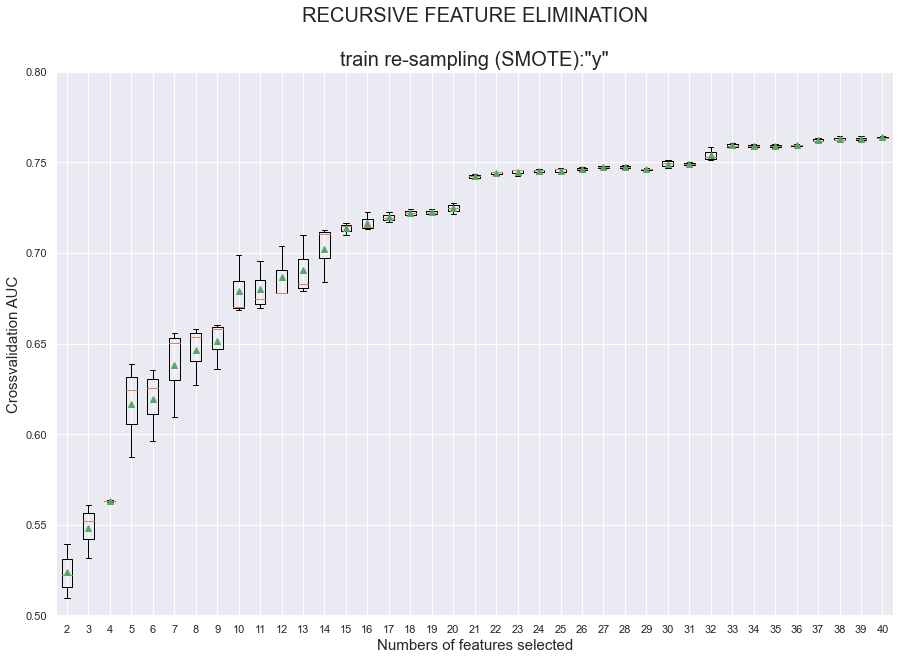

In [58]:
if rfe == "y":

    # RFE with LightGBM classifier

    # get a list of models to evaluate
    def get_models():
        models = dict()
        for i in range(2, features_num+1):
            models[str(i)] = RFE(estimator=classifier, n_features_to_select=i)
        return models

    # data from each foldf
    fold_results = list()
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df_train_filtered_std, y_train)):
        train_x, train_y = df_train_filtered_std.iloc[train_idx], y_train.iloc[train_idx]
        valid_x, valid_y = df_train_filtered_std.iloc[valid_idx], y_train.iloc[valid_idx]

        # summarize class distribution
        counter = Counter(train_y)
        print('\n-----------------------------------------------------')
        print('Fold %2d, original distribution: ' % (n_fold + 1))
        print(counter)

        if smote=='y':
            # transform the dataset
            oversample = BorderlineSMOTE()
            train_x, train_y = oversample.fit_resample(train_x, train_y)
            # summarize the new class distribution
            counter = Counter(train_y)
            print('Fold %2d, re-sampled distribution: ' % (n_fold + 1))
            print(counter)


        # get the models to evaluate
        models = get_models()

        # evaluate the models and store results
        models_results, names = list(), list()
        for name, model in models.items():

            # Print the number of features of the model
            print('\nFeatures:%s' % (name))

            # fit RFE
            model.fit(train_x, train_y)

            # validation per model
            probas = model.predict_proba(valid_x)[:, 1]

            # ROC-AUC per model
            AUC = roc_auc_score(valid_y, probas)

            # Collecting results
            models_results.append(AUC)
            names.append(name)

            # summarize all features
            for i in range(train_x.shape[1]):
                print('Column: %d, Selected %s, Rank: %.3f' % (i, model.support_[i], model.ranking_[i]))

            # Print AUC score
            print(f'\nAUC: {AUC}')

        print('\nModels results')
        print(models_results)

        fold_results.append(models_results)

    print('\nFolds results')
    print(fold_results)

    fold_results = np.asarray(fold_results)
    # plot model performance for comparison
    plt.figure(figsize=(15,10))
    plt.boxplot(fold_results, labels=range(2,features_num+1), showmeans=True)
    plt.title('RECURSIVE FEATURE ELIMINATION'
             f'\n\ntrain re-sampling (SMOTE):"{smote}"',fontsize=20)
    plt.xlabel('Numbers of features selected',fontsize=15)
    plt.ylabel('Crossvalidation AUC',fontsize=15)
    plt.ylim((0.5, 0.8))
    
    # save
    plt.savefig(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\feature_selection_RFE_feature_number.png', transparent=True)
    
    plt.show()

In [59]:
if (rfe == "y"):
    
    # create a dataframe of results
    rfe_fold_auc_results_df = pd.DataFrame(fold_results, columns=range(2,41), index=['Fold1', 'Fold2', 'Fold3'])

    # Saving to csv 
    returnValue = rfe_fold_auc_results_df.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\rfe_fold_auc_results_df.csv',sep = ',', index=False)
    print(returnValue)

None


#### Inverse standardization transform

In [33]:
if (rfe == "y"):

    # Inverse transform (train)
    X_train_filtered = std_scale.inverse_transform(df_train_filtered_std)
    
    # Inverse transform (val)
    X_val_filtered = std_scale.inverse_transform(df_val_filtered_std)

In [34]:
if (rfe == "y"):

    # Creating a new train dataframe 
    df_train_filtered = pd.DataFrame(X_train_filtered, columns=df_train_filtered_std.columns)
    
    # Creating a new train dataframe 
    df_val_filtered = pd.DataFrame(X_val_filtered, columns=df_val_filtered_std.columns)


#### Final number of features

In [35]:
if (rfe == "y"):

    # Defining the final number of features
    rfe_feature_number = input("Select the final number of features")
    rfe_feature_number = int(rfe_feature_number)

Select the final number of features 30


In [36]:
# create model
rfe = RFE(estimator=classifier, n_features_to_select=rfe_feature_number)

# fit RFE
rfe.fit(df_train_filtered_std, y_train)

# validation per model
probas = rfe.predict_proba(df_val_filtered_std)[:, 1]

# ROC-AUC per model
validation_ROC_AUC = roc_auc_score(y_val, probas)

AUC_list = list()

# data reading and viewing
fold_results = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\rfe_fold_auc_results_df.csv',sep=',',dtype='object')
fold_results = fold_results.astype('float')
fold_results = fold_results.to_numpy()

for i in range(0, splits):
    model_results = list(fold_results[i])
    k = rfe_feature_number - 1
    value = model_results[k]
    AUC_list.append(float(value))
    
mean_crossvalid_fold_ROC_AUC = sum(AUC_list)/len(AUC_list)

# The list of column names as mentioned in the CSV file
headersCSV = ['rfe_feature_number','mean_crossvalid_fold_ROC_AUC','Validation_ROC_AUC','custom_loss','fbeta','splits']      

# The data assigned to the dictionary 
dict={'rfe_feature_number': rfe_feature_number, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC, 'Validation_ROC_AUC' : validation_ROC_AUC, 'custom_loss': custom_loss,
  'fbeta': fbeta_number, 'splits': splits }

# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\rfe_AUC.csv', 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

rfe_features = list(df_train_filtered_std.columns*rfe.support_)  
rfe_features = [x for x in rfe_features if x!='']

# Filtering the dataframe (train)
df_train_filtered_RFE = df_train_filtered[rfe_features]

# Filtering the dataframe (val)
df_val_filtered_RFE = df_val_filtered[rfe_features]

# Adding the target (train)
df_train_filtered_RFE['TARGET'] = y_train

# Adding the target (val)
df_val_filtered_RFE['TARGET'] = y_val

# Adding the loan ID (train)
df_train_filtered_RFE['SK_ID_CURR'] = z_train

# Adding the loan ID (val)
df_val_filtered_RFE['SK_ID_CURR'] = z_val

# Saving to csv 
returnValue = df_train_filtered_RFE.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\df_train_filtered_RFE.csv',sep = ',', index=False)
print(returnValue)

# Saving to csv 
returnValue = df_val_filtered_RFE.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\df_val_filtered_RFE.csv',sep = ',', index=False)
print(returnValue)

# saving features in a json file
tf = open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\rfe_features_list.json", "w")
json.dump(rfe_features,tf)
tf.close()

C:\Users\vince\AppData\Local\Temp/ipykernel_49972/1353207600.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_filtered_RFE['TARGET'] = y_train
C:\Users\vince\AppData\Local\Temp/ipykernel_49972/1353207600.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_filtered_RFE['TARGET'] = y_val
C:\Users\vince\AppData\Local\Temp/ipykernel_49972/1353207600.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

None
None


In [72]:
if rfe == "y":

    # create model
    rfe = RFE(estimator=classifier, n_features_to_select=rfe_feature_number)


In [73]:
if rfe == "y":

    # fit RFE
    rfe.fit(df_train_filtered_std, y_train)

    # validation per model
    probas = rfe.predict_proba(df_val_filtered_std)[:, 1]

    # ROC-AUC per model
    validation_ROC_AUC = roc_auc_score(y_val, probas)
    validation_ROC_AUC

In [74]:
if rfe == "y":

    AUC_list = list()

    for i in range(0, splits):
        model_results = list(fold_results[i])
        k = rfe_feature_number - 1
        value = model_results[k]
        AUC_list.append(value)

    mean_crossvalid_fold_ROC_AUC = sum(AUC_list)/len(AUC_list)
    
    

In [75]:
if rfe == "y":
    # The list of column names as mentioned in the CSV file
    headersCSV = ['rfe_feature_number','mean_crossvalid_fold_ROC_AUC','Validation_ROC_AUC','custom_loss','fbeta','splits']      
    
    # The data assigned to the dictionary 
    dict={'rfe_feature_number': rfe_feature_number, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC, 'Validation_ROC_AUC' : validation_ROC_AUC, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}

    # Pre-requisite - The CSV file should be manually closed before running this code.

    # First, open the old CSV file in append mode, hence mentioned as 'a'
    # Then, for the CSV file, create a file object
    with open(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\rfe_AUC.csv', 'a', newline='') as f_object:
        # Pass the CSV  file object to the Dictwriter() function
        # Result - a DictWriter object
        dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
        # Pass the data in the dictionary as an argument into the writerow() function
        dictwriter_object.writerow(dict)
        # Close the file object
        f_object.close()

In [76]:
if rfe == "y":
    rfe_features = list(df_train_filtered_std.columns*rfe.support_)
    rfe_features = [x for x in rfe_features if x!='']
    rfe_features

In [77]:
if (rfe == "y"):

    # Filtering the dataframe (train)
    df_train_filtered_RFE = df_train_filtered[rfe_features]
    df_train_filtered_RFE

In [78]:
if (rfe == "y"):

    # Filtering the dataframe (val)
    df_val_filtered_RFE = df_val_filtered[rfe_features]
    df_val_filtered_RFE

In [79]:
if (rfe == "y"):

    # Adding the target (train)
    df_train_filtered_RFE['TARGET'] = y_train
    df_train_filtered_RFE

In [80]:
if (rfe == "y"):

    # Adding the target (val)
    df_val_filtered_RFE['TARGET'] = y_val
    df_val_filtered_RFE

In [81]:
if (rfe == "y"):

    # Saving to csv 
    returnValue = df_train_filtered_RFE.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\df_train_filtered_RFE.csv',sep = ',', index=False)
    print(returnValue)


In [82]:
if (rfe == "y"):

    # Saving to csv 
    returnValue = df_val_filtered_RFE.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\df_val_filtered_RFE.csv',sep = ',', index=False)
    print(returnValue)

In [83]:
if (rfe == "y"):

    # saving features in a json file
    tf = open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\rfe_features_list.json", "w")
    json.dump(rfe_features,tf)
    tf.close()

### Feature selection RFECV (smote:'n')

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Copy of values to be trained and transformed
    df_train_std_filtered_RFECV = df_train_filtered_std.copy()
    df_val_std_filtered_RFECV = df_val_filtered_std.copy()

#### Without training smote re-sampling

In [ ]:
if (smote == 'n')&(rfe == "y"):
    
    # RFECV with LightGBM classifier
    
    # LightGBM instance
    classifier = LGBMClassifier(
    objective='binary',
    n_estimators=10000, # trees to build
    learning_rate=0.01, # Multiplication performed on each boosting iteration
    max_depth=10, # Maximum tree depth for base learners, <=0 means no limit
    num_leaves = 32, # num_leaves = 2^(max_depth)
    colsample_bytree = 0.2, # Percentage of columns used per iteration
    subsample = 0.9, # (bagging_fraction) you can specify the percentage of rows used per tree building iteration
    min_child_weight = 100,
    random_state=1234,
    #eval_set=[(df_train_std_filtered_RFECV, y_train), (df_val_std_filtered_RFECV, y_val)],
    #early_stopping_rounds=200
    )

    # RFECV instance
    rfecv_model = RFECV(estimator=classifier, step=1, scoring='roc_auc', cv=splits, verbose=200)

    # Timer start
    start_time = timeit.default_timer()

    # Model fitting
    rfecv_model.fit(df_train_std_filtered_RFECV, y_train)

    # Prediction
    pred = rfecv_model.predict(df_val_std_filtered_RFECV)

    # Timer end
    elapsed = timeit.default_timer() - start_time


In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Performance
    accuracy = accuracy_score(y_val, pred)

    print("accuracy: {:.2f}; time: {:.2f}s".format(accuracy, elapsed))

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Optimal number of features according to RFECV
    rfecv_optimal_feature_number = rfecv_model.n_features_
    print('Optimal number of features: {}'.format(rfecv_optimal_feature_number))

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Evolution of the performance with the number of features
    plt.figure(figsize=(16, 9), constrained_layout=True)
    plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
    plt.ylabel('AUC', fontsize=14, labelpad=20)
    plt.plot(range(1, len(rfecv_model.grid_scores_) + 1), rfecv_model.grid_scores_, color='#303F9F', linewidth=3)

    # Arrange the x lables
    locs, labels = xticks()  # Get the current locations and labels.
    xticks(np.arange(1, len(rfecv_model.grid_scores_) + 1, step=1))  # Set label locations.

    # save
    plt.savefig(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\feature_selection_RFECV_feature_number.png', transparent=True)

    plt.show()

#### Inverse standardization transform

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Inverse transform (train)
    X_train_filtered_RFECV = std_scale.inverse_transform(df_train_std_filtered_RFECV)
    
    # Inverse transform (val)
    X_val_filtered_RFECV = std_scale.inverse_transform(df_val_std_filtered_RFECV)

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Creating a new train dataframe 
    df_train_filtered_RFECV = pd.DataFrame(X_train_filtered_RFECV, columns=df_train_std_filtered.columns)
    
    # Creating a new train dataframe 
    df_train_filtered_RFECV = pd.DataFrame(X_val_filtered_RFECV, columns=df_val_std_filtered.columns)

    

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Least important features

    print(np.where(rfecv_model.support_ == False)[0])

    df_train_filtered_RFECV.drop(df_train_filtered_RFECV.columns[np.where(rfecv_model.support_ == False)[0]], axis=1, inplace=True)
    df_train_filtered_RFECV

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Barplot of sorted features by importance 
    dset = pd.DataFrame()
    dset['attr'] = df_train_filtered_RFECV.columns
    dset['importance'] = rfecv_model.estimator_.feature_importances_

    dset = dset.sort_values(by='importance', ascending=True)

    plt.figure(figsize=(30, 14), constrained_layout=True)
    plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
    plt.title('RFECV (Random Forest) - Feature Importances', fontsize=30, fontweight='bold', pad=20)
    plt.xlabel('Importance', fontsize=20, labelpad=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # save
    plt.savefig(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\feature_selection_RFECV_importances.png', transparent=True)

    plt.show()

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Sorting features
    dset.sort_values(by='importance', ascending=False, inplace=True)

#### Final number of features

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Defining the final number of features
    rfecv_feature_number = input("Select the final number of features")
    rfecv_feature_number = int(rfecv_feature_number)

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Filtering with the number of features
    dset['attr'][0:rfecv_feature_number]

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Defining the list of features
    rfecv_features = list(dset['attr'][0:rfecv_feature_number])
    rfecv_features

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Filtering the dataframe (train)
    df_train_filtered_RFECV = df_train_filtered[rfecv_features]
    df_train_filtered_RFECV

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Filtering the dataframe (val)
    df_val_filtered_RFECV = df_val_filtered[rfecv_features]
    df_val_filtered_RFECV

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Adding the target (train)
    df_train_filtered_RFECV['TARGET'] = y_train
    df_train_filtered_RFECV

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Adding the target (val)
    df_val_filtered_RFECV['TARGET'] = y_val
    df_val_filtered_RFECV

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Saving to csv 
    returnValue = df_train_filtered_RFECV.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\df_train_filtered_RFECV.csv',sep = ',', index=False)
    print(returnValue)


In [ ]:
if (smote == 'n')&(rfe == "y"):

    # Saving to csv 
    returnValue = df_val_filtered_RFECV.to_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\df_val_filtered_RFECV.csv',sep = ',', index=False)
    print(returnValue)

In [ ]:
if (smote == 'n')&(rfe == "y"):

    # saving features in a json file
    tf = open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\feature_selection\\{class_weigh_case}\\rfecv_features_list.json", "w")
    json.dump(rfecv_features,tf)
    tf.close()

# MODELING (case)

In [1]:
import pandas as pd
from scipy import stats
import gc as gc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import timeit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, fbeta_score, confusion_matrix, f1_score
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.model_selection import KFold
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from dtreeviz.trees import*

import scikitplot as skplt

from csv import DictWriter

## Redefining the study case

In [2]:
smote = input("SMOTE re-sampling of the train part? (y/n)")

SMOTE re-sampling of the train part? (y/n) n


In [3]:
class_weigh = 'n'

In [4]:
rfe = input("Recursive feature selection? (y/n)")

Recursive feature selection? (y/n) n


In [5]:
# smote parameter 
if smote=='n':
    smote_case=1
    
if smote=='y':
    smote_case=2

In [6]:
# class weigh parameter 
if class_weigh=='n':
    class_weigh_case='.'
    
if class_weigh=='y':
    class_weigh_case='class_weigh_coefficient'

In [7]:
# rfe parameter 
if rfe == "y":
    rfe_case = "with_RFECV"
    
if rfe == "n":
    rfe_case = "without_RFECV"

## Folds

In [8]:
splits = input('If crossvalidation, choose the number of splits: (3/5)')
splits = int(splits)

If crossvalidation, choose the number of splits: (3/5) 3


In [9]:
# define evaluation
folds = KFold(n_splits=splits, shuffle=True, random_state=1)

## Choice of the loss function to optimize thresholds

### custom function

In [10]:
custom_loss = input("Custom loss function: (y/n)")

if custom_loss=='y':
    fbeta=False
    fbeta_number=0

Custom loss function: (y/n) y


### fbeta 

In [11]:
if custom_loss=='n':
    fbeta=True
    
    fbeta_number = input("Enter the fbeta number: (2/5/10)")
    fbeta_number = int(fbeta_number)
    

## Data loading

In [12]:
if (rfe=="n"):
    
    # Data reading with path information (train)
    df_train = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\df_train.csv',sep=',')

    # Data reading with path information (val)
    df_val = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\cleaning\\df_val.csv',sep=',')

In [13]:
if (rfe=="y")&(smote=="n"):
    
    # Data reading with path information (train)
    df_train = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_1\\feature_selection\\df_train_filtered_RFE.csv',sep=',')

    # Data reading with path information (val)
    df_val = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_1\\feature_selection\\df_val_filtered_RFE.csv',sep=',')
 

In [14]:
if (rfe=="y")&(smote=="y"):

    # Data reading with path information (train)
    df_train = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_2\\feature_selection\\df_train_filtered_RFE.csv',sep=',')
    
    # Data reading with path information (val)
    df_val = pd.read_csv(f'projets\\07_loan_customer_scoring\\production\\savefig\\model_test_2\\feature_selection\\df_val_filtered_RFE.csv',sep=',')


## Data transformation

In [15]:
# Defining the targets
y_train = df_train['TARGET']
y_val = df_val['TARGET']

In [16]:
# Target removal from dataframes
df_train.drop(['TARGET'], axis=1, inplace=True)
df_val.drop(['TARGET'], axis=1, inplace=True)

In [17]:
# keeping loan ID
z_train = df_train['SK_ID_CURR']
z_val = df_val['SK_ID_CURR'] 

In [18]:
# Create arrays and dataframes to store results
feats = [f for f in df_train.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

# Modification of columns
df_train = df_train[feats]
df_val = df_val[feats]
df_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_train.columns]
df_val.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_val.columns]

In [19]:
X_train = df_train
X_val = df_val

In [20]:
# Data standardization
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)

In [21]:
# Creation of a dataframe to keep the feature names
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_val_std  = pd.DataFrame(X_val_std, columns=X_val.columns)

## Function kfold_classification

In [22]:
def kfold_classif(classifier, folds, df_train_std, target_train, df_val_std, target_val, custom_loss, fbeta, fbeta_number=0, logistic_regression=False, train_resampling='n', eval_set=False,
                  scorer='auc', early_stopping_rounds=None, verbose=200):
    """K_fold training/validation for DecisionTree/RandomForest/LightGBM/XGBoost/CATBoost/LogisticRegression,
    train_resampling-> borderline smote re-sampling on the train part,
    fbetanumber-> for function to optimize"""

    """"num_iteration=clf.best_iteration_    can be added in the predict_proba() when callable """
    
# Create arrays and dataframes to store results
    crossvalid_probas = np.zeros(df_train_std.shape[0])
    valid_probas = np.zeros(df_val_std.shape[0])
    fold_AUC_list = []
    feature_importance_df = pd.DataFrame()
    feats = [f for f in df_train_std.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

    # Modification of columns
    df_train_std_2 = df_train_std[feats]
    df_val_std_2 = df_val_std[feats]
    df_train_std_2.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_train_std_2.columns]
    df_val_std_2.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_val_std_2.columns]

    # define thresholds
    thresholds = np.arange(0, 1, 0.001)
    # apply threshold to positive probabilities to create labels
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    def custom_cost_function(testy, yhat):
        # get the fn and the fp from the confusion matrix
        tn, fp, fn, tp = confusion_matrix(testy, yhat).ravel()
        # function
        y = 10*fn + fp
        return y
        
    # data from each fold
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df_train_std_2, target_train)):
        train_x, train_y = df_train_std_2.iloc[train_idx], target_train.iloc[train_idx]
        valid_x, valid_y = df_train_std_2.iloc[valid_idx], target_train.iloc[valid_idx]   
        
        # Re-sampling 
        if train_resampling=='y':
            # summarize class distribution
            counter = Counter(train_y)
            print('Fold %2d, original distribution: ' % (n_fold + 1))
            print(counter)
            
            # transform the dataset
            oversample = BorderlineSMOTE()
            train_x, train_y = oversample.fit_resample(train_x, train_y)
            # summarize the new class distribution
            counter = Counter(train_y)
            print('Fold %2d, re-sampled distribution: ' % (n_fold + 1))
            print(counter)
     
        # classifier instance
        clf = classifier

        # fitting
        if eval_set==True:
            clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric=scorer, verbose=verbose, early_stopping_rounds=early_stopping_rounds)
        
        if eval_set==False:
            clf.fit(train_x, train_y)

        # validation
        crossvalid_probas[valid_idx] = clf.predict_proba(valid_x)[:, 1]
        
        # ROC-AUC
        AUC = roc_auc_score(valid_y, crossvalid_probas[valid_idx])
        fold_AUC_list.append(AUC)

        # showing results from each fold
        print('Fold %2d AUC : %.6f' % (n_fold + 1, AUC))
           
        # Collecting results
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats
        
        # Classifier case
        if logistic_regression==True:
            fold_importance_df["importance"] = clf.coef_[0]
        if logistic_regression==False:
            fold_importance_df["importance"] = clf.feature_importances_
            
        fold_importance_df["fold"] = n_fold + 1
        fold_importance_df["val_fold_AUC"] = AUC
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
                
        #validation_ROC_AUC = roc_auc_score(target_train, crossvalid_probas)
        valid_probas += clf.predict_proba(df_val_std)[:, 1] / folds.n_splits      
                
        del train_x, train_y, valid_x, valid_y
        gc.collect()

    # Final performance
    mean_crossvalid_fold_ROC_AUC = sum(fold_AUC_list)/len(fold_AUC_list)
    print('Mean cross-validation ROC-AUC score %.6f' % mean_crossvalid_fold_ROC_AUC)
    
    #validation_ROC_AUC = roc_auc_score(target_train, crossvalid_probas)
    validation_ROC_AUC = roc_auc_score(target_val, valid_probas)
    print('Validation ROC-AUC score %.6f' % validation_ROC_AUC)
    
    # Optimising the threshold  
    
    if (fbeta==True)&(fbeta_number!=0):
        # evaluate each threshold with f-beta loss function
        scores = [fbeta_score(target_val.values, to_labels(valid_probas, t), average='weighted', beta=fbeta_number) for t in thresholds]
    
        # get best threshold
        ix = np.argmax(scores)
        print(f'Threshold=%.3f, F-{fbeta_number} score_max=%.5f' % (thresholds[ix], scores[ix]))
        best_score = scores[ix]
        threshold = thresholds[ix]
        
        
    if custom_loss=='y':
        # evaluate each threshold with custom loss function
        scores = [custom_cost_function(target_val.values, to_labels(valid_probas, t)) for t in thresholds]
        
        # get best threshold
        ix = np.argmin(scores)
        print(f'Threshold=%.3f, Custom loss function (10*fn + fp) score_min=%.5f' % (thresholds[ix], scores[ix]))
        best_score = scores[ix]
        threshold = thresholds[ix]
        
        
    return clf, feature_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold
    
    

## Collection of results

In [23]:
# Creation of a dictionnary to recolt the model results
train_model_results = {}

In [24]:
# The list of column names as mentioned in the CSV file
headersCSV = ['ID','Model','Computing_time','mean_crossvalid_fold_ROC_AUC','Validation_ROC_AUC','Optimized_threshold',
              'best_score','custom_loss','fbeta','splits']      

## Models

### Baseline : Dummy

In [25]:
# Model that always predicts the mean of the training set
dummy_clf = DummyClassifier(strategy="uniform")

# Timer start
start_time = timeit.default_timer()

# Model fitting
dummy_clf.fit(X_train_std, y_train)

# Class probabilities
probas_1 = dummy_clf.predict_proba(y_val)[:,1]

# ROC_AUC
baseline_ROC_AUC = roc_auc_score(y_val, probas_1)
print(f'AUC class 1: {baseline_ROC_AUC}')

# Timer end
elapsed = timeit.default_timer() - start_time

AUC class 1: 0.5


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


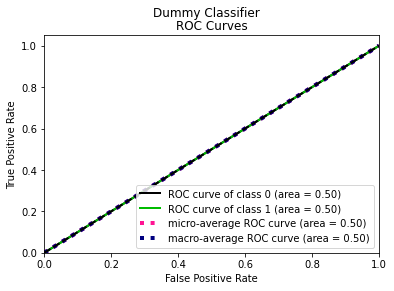

In [26]:
# ROC curve
probas = dummy_clf.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("Dummy Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\dummy\\roc_dummy.png", dpi=300)

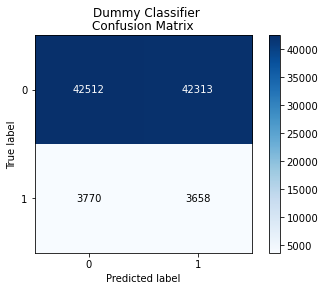

In [27]:
# Confusion matrix
y_pred = dummy_clf.predict(X_val_std)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("Dummy Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\dummy\\confusion_matrix_dummy.png", dpi=300)

In [28]:
# Special case, specifying directly the values
mean_crossvalid_fold_ROC_AUC = baseline_ROC_AUC
validation_ROC_AUC = baseline_ROC_AUC
threshold = 0.5

if fbeta==True:
    # f-beta score
    # f10 which weighs more recall than precision
    best_score = fbeta_score(y_val, y_pred, average='weighted', beta=fbeta_number)


else:
    best_score=np.NaN


In [29]:
# Collecting results
train_model_results['classifier/Dummy'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score, splits]

In [30]:
# The data assigned to the dictionary 
dict={'ID': 1, 'Model' : 'classifier/Dummy', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

### Decision Tree

In [31]:
# model instance
classifier = DecisionTreeClassifier(max_depth=3, random_state=1234)

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
dt_clf, dt_clf_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                      folds,
                                                                                                                      X_train_std,
                                                                                                                      y_train,
                                                                                                                      X_val_std,
                                                                                                                      y_val,
                                                                                                                      custom_loss,
                                                                                                                      fbeta,
                                                                                                                      fbeta_number,
                                                                                                                      logistic_regression=False,
                                                                                                                      train_resampling=smote,
                                                                                                                      eval_set=False,
                                                                                                                      scorer='auc',
                                                                                                                      early_stopping_rounds=500,
                                                                                                                      verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

Fold  1 AUC : 0.683021
Fold  2 AUC : 0.682202
Fold  3 AUC : 0.681593
Mean cross-validation ROC-AUC score 0.682272
Validation ROC-AUC score 0.693390
Threshold=0.093, Custom loss function (10*fn + fp) score_min=55241.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


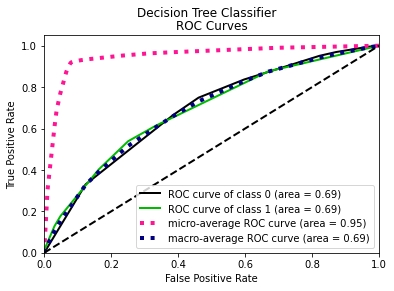

In [32]:
# ROC curve
probas = dt_clf.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("Decision Tree Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\decision_tree\\roc_decision_tree.png", dpi=300)

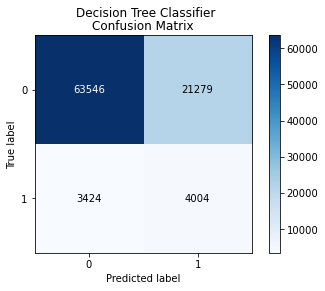

In [33]:
# Confusion matrix
y_pred = (dt_clf.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("Decision Tree Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\decision_tree\\confusion_matrix_decision_tree.png", dpi=300)

In [34]:
# Collecting results
train_model_results['classifier/DecisionTree'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [35]:
# The data assigned to the dictionary 
dict={'ID': 2, 'Model' : 'classifier/DecisionTree', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

In [36]:
# Tree representation
text_representation = tree.export_text(dt_clf)
print(text_representation)

|--- feature_32 <= -1.13
|   |--- feature_31 <= -0.84
|   |   |--- feature_31 <= -2.31
|   |   |   |--- class: 0
|   |   |--- feature_31 >  -2.31
|   |   |   |--- class: 0
|   |--- feature_31 >  -0.84
|   |   |--- feature_32 <= -2.21
|   |   |   |--- class: 0
|   |   |--- feature_32 >  -2.21
|   |   |   |--- class: 0
|--- feature_32 >  -1.13
|   |--- feature_31 <= -0.62
|   |   |--- feature_32 <= 0.20
|   |   |   |--- class: 0
|   |   |--- feature_32 >  0.20
|   |   |   |--- class: 0
|   |--- feature_31 >  -0.62
|   |   |--- feature_32 <= 0.12
|   |   |   |--- class: 0
|   |   |--- feature_32 >  0.12
|   |   |   |--- class: 0



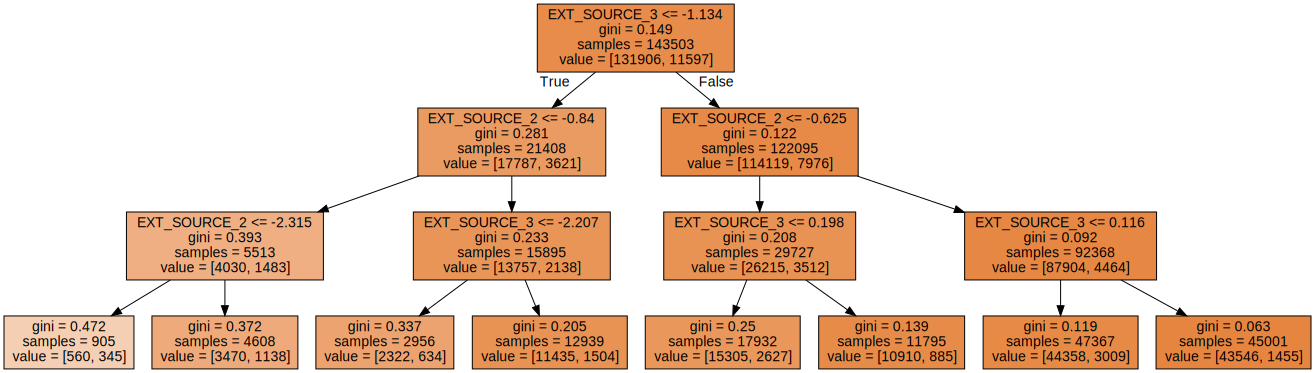

In [37]:
# graphviz 
dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                feature_names=X_train_std.columns,  
                                filled=True)
src = graphviz.Source(dot_data, format="png") 

# save fig
src.render(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\decision_tree\\decision_tree.gv", view=True)

# show
src

In [38]:
# dtreeviz 
viz = dtreeviz(dt_clf,
               X_train_std,
               y_train,
               target_name='TARGET',
               feature_names=X_train_std.columns)
              
viz.view()

C:\Users\vince\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### RandomizedSearchCV

##### Decision Tree - bis (after RandomizedSearchCV)

In [39]:
# model instance
classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    max_features=5,
    min_samples_leaf=7,
    random_state=1234
) 

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
dt_clf_bis, dt_clf_bis_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                              folds,
                                                                                                                              X_train_std,
                                                                                                                              y_train,
                                                                                                                              X_val_std,
                                                                                                                              y_val,
                                                                                                                              custom_loss,
                                                                                                                              fbeta,
                                                                                                                              fbeta_number,
                                                                                                                              logistic_regression=False,
                                                                                                                              train_resampling=smote,
                                                                                                                              eval_set=False,
                                                                                                                              scorer='auc',
                                                                                                                              early_stopping_rounds=500,
                                                                                                                              verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

Fold  1 AUC : 0.587947
Fold  2 AUC : 0.594556
Fold  3 AUC : 0.591727
Mean cross-validation ROC-AUC score 0.591410
Validation ROC-AUC score 0.599801
Threshold=0.088, Custom loss function (10*fn + fp) score_min=66359.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


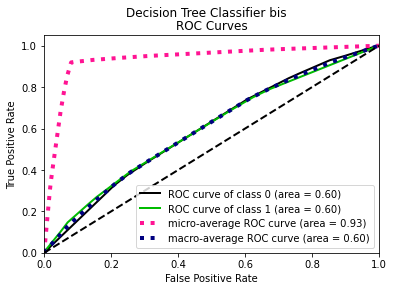

In [40]:
# ROC curve
probas = dt_clf_bis.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("Decision Tree Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\decision_tree\\roc_decision_tree_bis.png", dpi=300)

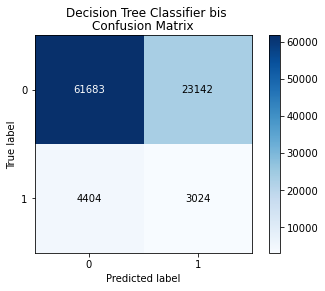

In [41]:
# Confusion matrix
y_pred = (dt_clf_bis.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("Decision Tree Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\decision_tree\\confusion_matrix_decision_tree_bis.png", dpi=300)

In [42]:
# Collecting results
train_model_results['classifier/DecisionTree_bis'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [43]:
# The data assigned to the dictionary 
dict={'ID': '2bis', 'Model' : 'classifier/DecisionTree_bis', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

### Random forest

In [44]:
# model instance
classifier = RandomForestClassifier(random_state=1234)

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
rf_clf, rf_clf_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                      folds,
                                                                                                                      X_train_std,
                                                                                                                      y_train,
                                                                                                                      X_val_std,
                                                                                                                      y_val,
                                                                                                                      custom_loss,
                                                                                                                      fbeta,
                                                                                                                      fbeta_number,
                                                                                                                      logistic_regression=False,
                                                                                                                      train_resampling=smote,
                                                                                                                      eval_set=False,
                                                                                                                      scorer='auc',
                                                                                                                      early_stopping_rounds=500,
                                                                                                                      verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

Fold  1 AUC : 0.707300
Fold  2 AUC : 0.707815
Fold  3 AUC : 0.706206
Mean cross-validation ROC-AUC score 0.707107
Validation ROC-AUC score 0.724085
Threshold=0.121, Custom loss function (10*fn + fp) score_min=52678.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


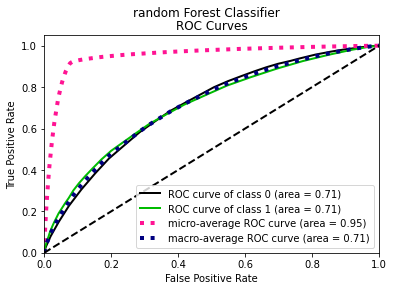

In [45]:
# ROC curve
probas = rf_clf.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("random Forest Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\random_forest\\roc_random_forest.png", dpi=300)

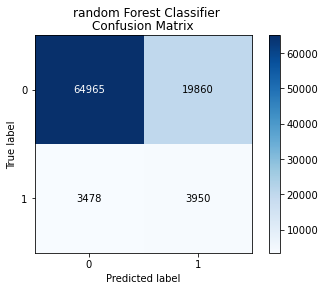

In [46]:
# Confusion matrix
y_pred = (rf_clf.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("random Forest Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\random_forest\\confusion_matrix_random_forest.png", dpi=300)

In [47]:
# Collecting results
train_model_results['classifier/RandomForest'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [48]:
# The data assigned to the dictionary 
dict={'ID': 4, 'Model' : 'classifier/RandomForest', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

#### RandomizedSearchCV

##### Random forest - bis (after RandomizedSearchCV)

In [49]:
# model instance
classifier = RandomForestClassifier(
    bootstrap=True,
    max_depth=4,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=8,
    n_estimators=231
) 

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
rf_clf_bis, rf_clf_bis_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                              folds,
                                                                                                                              X_train_std,
                                                                                                                              y_train,
                                                                                                                              X_val_std,
                                                                                                                              y_val,
                                                                                                                              custom_loss,
                                                                                                                              fbeta,
                                                                                                                              fbeta_number,
                                                                                                                              logistic_regression=False,
                                                                                                                              train_resampling=smote,
                                                                                                                              eval_set=False,
                                                                                                                              scorer='auc',
                                                                                                                              early_stopping_rounds=500,
                                                                                                                              verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

Fold  1 AUC : 0.717042
Fold  2 AUC : 0.730529
Fold  3 AUC : 0.706207
Mean cross-validation ROC-AUC score 0.717926
Validation ROC-AUC score 0.721813
Threshold=0.086, Custom loss function (10*fn + fp) score_min=53405.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


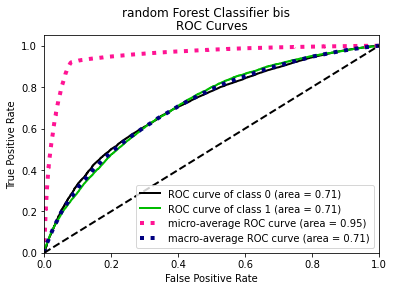

In [50]:
# ROC curve
probas = rf_clf_bis.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("random Forest Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\random_forest\\roc_random_forest_bis.png", dpi=300)

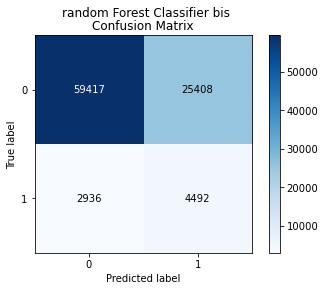

In [51]:
# Confusion matrix
y_pred = (rf_clf_bis.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("random Forest Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\random_forest\\confusion_matrix_random_forest_bis.png", dpi=300)

In [52]:
# Collecting results
train_model_results['classifier/RandomForest_bis'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [53]:
# The data assigned to the dictionary 
dict={'ID': '4bis', 'Model' : 'classifier/RandomForest_bis', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

### XGBoost

In [54]:
# model instance
classifier = XGBClassifier(objective = "binary:logistic") 

# Timer start
start_time = timeit.default_timer()

# k fold classification
xgb_clf, xgb_clf_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                        folds,
                                                                                                                        X_train_std,
                                                                                                                        y_train,
                                                                                                                        X_val_std,
                                                                                                                        y_val,
                                                                                                                        custom_loss,
                                                                                                                        fbeta,
                                                                                                                        fbeta_number,
                                                                                                                        logistic_regression=False,
                                                                                                                        train_resampling=smote,
                                                                                                                        eval_set=True,
                                                                                                                        scorer='auc',
                                                                                                                        early_stopping_rounds=500,
                                                                                                                        verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71992	validation_1-auc:0.70354
[99]	validation_0-auc:0.92901	validation_1-auc:0.76142
Fold  1 AUC : 0.765204


C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71781	validation_1-auc:0.70716
[99]	validation_0-auc:0.93061	validation_1-auc:0.76523
Fold  2 AUC : 0.770784


C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72281	validation_1-auc:0.70586
[99]	validation_0-auc:0.92820	validation_1-auc:0.76273
Fold  3 AUC : 0.765180
Mean cross-validation ROC-AUC score 0.767056
Validation ROC-AUC score 0.784620
Threshold=0.080, Custom loss function (10*fn + fp) score_min=45401.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


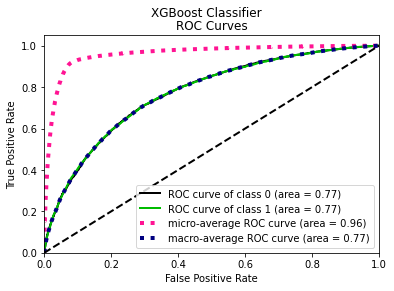

In [55]:
# ROC curve
probas = xgb_clf.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("XGBoost Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\XGBoost\\roc_xgboost.png", dpi=300)

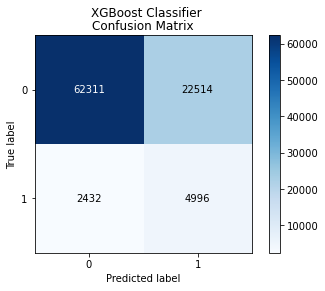

In [56]:
# Confusion matrix
y_pred = (xgb_clf.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("XGBoost Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\XGBoost\\confusion_matrix_xgboost.png", dpi=300)

In [57]:
# Collecting results
train_model_results['classifier/XGBoost'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [58]:
# The data assigned to the dictionary 
dict={'ID': 6, 'Model' : 'classifier/XGBoost', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

#### RandomizedSearchCV

##### XGBoost bis (after RandomizedSearchCV)

In [59]:
# model instance
classifier = XGBClassifier(
    objective = "binary:logistic",
    n_estimators = 420,
    learning_rate = 0.1690,
    subsample = 0.6909,
    max_depth = 9,
    colsample_bytree = 0.7756,
    min_child_weight = 4,
    random_state=1234) 

# Timer start
start_time = timeit.default_timer()

# k fold classification
xgb_clf_bis, xgb_clf_bis_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                                folds,
                                                                                                                                X_train_std,
                                                                                                                                y_train,
                                                                                                                                X_val_std,
                                                                                                                                y_val,
                                                                                                                                custom_loss,
                                                                                                                                fbeta,
                                                                                                                                fbeta_number,
                                                                                                                                logistic_regression=False,
                                                                                                                                train_resampling=smote,
                                                                                                                                eval_set=True,
                                                                                                                                scorer='auc',
                                                                                                                                early_stopping_rounds=500,
                                                                                                                                verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73772	validation_1-auc:0.70315
[200]	validation_0-auc:0.99437	validation_1-auc:0.75012
[400]	validation_0-auc:0.99856	validation_1-auc:0.74625
[419]	validation_0-auc:0.99859	validation_1-auc:0.74595
Fold  1 AUC : 0.763444


C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73599	validation_1-auc:0.70419
[200]	validation_0-auc:0.99641	validation_1-auc:0.75726
[400]	validation_0-auc:1.00168	validation_1-auc:0.74991
[419]	validation_0-auc:1.00170	validation_1-auc:0.74986
Fold  2 AUC : 0.766566


C:\Users\vince\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.73706	validation_1-auc:0.70078
[200]	validation_0-auc:0.99638	validation_1-auc:0.75341
[400]	validation_0-auc:1.00065	validation_1-auc:0.74720
[419]	validation_0-auc:1.00067	validation_1-auc:0.74681
Fold  3 AUC : 0.760644
Mean cross-validation ROC-AUC score 0.763551
Validation ROC-AUC score 0.780948
Threshold=0.079, Custom loss function (10*fn + fp) score_min=45932.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


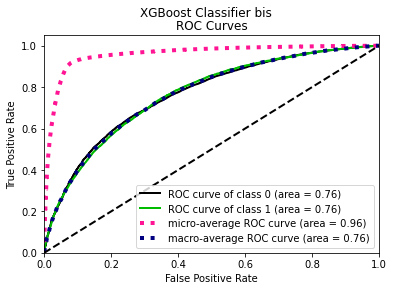

In [60]:
# ROC curve
probas = xgb_clf_bis.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("XGBoost Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\XGBoost\\roc_xgboost_bis.png", dpi=300)

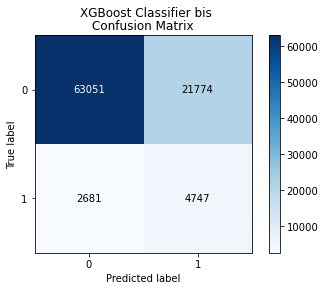

In [61]:
# Confusion matrix
y_pred = (xgb_clf_bis.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("XGBoost Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\XGBoost\\confusion_matrix_xgboost_bis.png", dpi=300)

In [62]:
# Collecting results
train_model_results['classifier/XGBoost_bis'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [63]:
# The data assigned to the dictionary 
dict={'ID': '7bis', 'Model' : 'classifier/XGBoost_bis', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

### LightGBM

In [64]:
# model instance
classifier = LGBMClassifier(objective='binary', random_state=1234) 

# Timer start
start_time = timeit.default_timer()

gbm_clf, gbm_clf_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                        folds,
                                                                                                                        X_train_std,
                                                                                                                        y_train,
                                                                                                                        X_val_std,
                                                                                                                        y_val,
                                                                                                                        custom_loss,
                                                                                                                        fbeta,
                                                                                                                        fbeta_number,
                                                                                                                        logistic_regression=False,
                                                                                                                        train_resampling=smote,
                                                                                                                        eval_set=True,
                                                                                                                        scorer='auc',
                                                                                                                        early_stopping_rounds=500,
                                                                                                                        verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold  1 AUC : 0.773935


C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold  2 AUC : 0.778316


C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fold  3 AUC : 0.771858
Mean cross-validation ROC-AUC score 0.774703
Validation ROC-AUC score 0.785820
Threshold=0.084, Custom loss function (10*fn + fp) score_min=45272.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


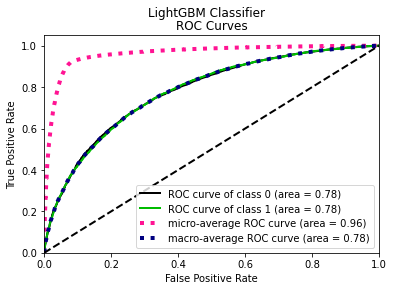

In [65]:
# ROC curve
probas = gbm_clf.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("LightGBM Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\LightGBM\\roc_lightgbm.png", dpi=300)

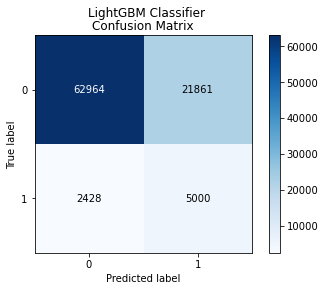

In [66]:
# Confusion matrix
y_pred = (gbm_clf.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("LightGBM Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\LightGBM\\confusion_matrix_lightgbm.png", dpi=300)

In [67]:
# Collecting results
train_model_results['classifier/LightGBM'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [68]:
# The data assigned to the dictionary 
dict={'ID': 8, 'Model' : 'classifier/LightGBM', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

#### RandomizedSearchCV

##### LightGBM bis (after RandomizedSearchCV)

In [69]:
# model instance
classifier = LGBMClassifier(
    objective='binary',
    n_estimators = 10000, # trees to build
    learning_rate = 0.01, # Multiplication performed on each boosting iteration
    max_depth = 8, # Maximum tree depth for base learners, <=0 means no limit
    num_leaves = 40, # num_leaves = 2^(max_depth)
    colsample_bytree = 0.95, # Percentage of columns used per iteration
    subsample = 0.9, # (bagging_fraction) you can specify the percentage of rows used per tree building iteration
    min_child_weight = 50,
    random_state=1234) 

# Timer start
start_time = timeit.default_timer()

gbm_clf_bis, gbm_clf_bis_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                                folds,
                                                                                                                                X_train_std,
                                                                                                                                y_train,
                                                                                                                                X_val_std,
                                                                                                                                y_val,
                                                                                                                                custom_loss,
                                                                                                                                fbeta,
                                                                                                                                fbeta_number,
                                                                                                                                logistic_regression=False,
                                                                                                                                train_resampling=smote,
                                                                                                                                eval_set=True,
                                                                                                                                scorer='auc',
                                                                                                                                early_stopping_rounds=500,
                                                                                                                                verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.787005	training's binary_logloss: 0.241681	valid_1's auc: 0.756598	valid_1's binary_logloss: 0.249672
[400]	training's auc: 0.814336	training's binary_logloss: 0.229756	valid_1's auc: 0.770644	valid_1's binary_logloss: 0.243816
[600]	training's auc: 0.83085	training's binary_logloss: 0.222535	valid_1's auc: 0.776336	valid_1's binary_logloss: 0.24156
[800]	training's auc: 0.842498	training's binary_logloss: 0.217387	valid_1's auc: 0.779366	valid_1's binary_logloss: 0.240482
[1000]	training's auc: 0.852501	training's binary_logloss: 0.213026	valid_1's auc: 0.781002	valid_1's binary_logloss: 0.2399
[1200]	training's auc: 0.861665	training's binary_logloss: 0.208977	valid_1's auc: 0.782021	valid_1's binary_logloss: 0.239529
[1400]	training's auc: 0.869887	training's binary_logloss: 0.205354	valid_1's auc: 0.782929	valid_1's binary_logloss: 0.239218
[1600]	training's auc: 0.8776	training's binary_logloss: 0.201928	valid_1's auc: 0.783592	valid_1's binary_logloss: 0.2

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.785572	training's binary_logloss: 0.242713	valid_1's auc: 0.76115	valid_1's binary_logloss: 0.248333
[400]	training's auc: 0.812491	training's binary_logloss: 0.230943	valid_1's auc: 0.77519	valid_1's binary_logloss: 0.242199
[600]	training's auc: 0.829691	training's binary_logloss: 0.223518	valid_1's auc: 0.780829	valid_1's binary_logloss: 0.239804
[800]	training's auc: 0.842224	training's binary_logloss: 0.21823	valid_1's auc: 0.783466	valid_1's binary_logloss: 0.238724
[1000]	training's auc: 0.852017	training's binary_logloss: 0.214125	valid_1's auc: 0.785014	valid_1's binary_logloss: 0.238125
[1200]	training's auc: 0.86137	training's binary_logloss: 0.210211	valid_1's auc: 0.786055	valid_1's binary_logloss: 0.237749
[1400]	training's auc: 0.869918	training's binary_logloss: 0.20653	valid_1's auc: 0.786623	valid_1's binary_logloss: 0.237572
[1600]	training's auc: 0.877423	training's binary_logloss: 0.203159	valid_1's auc: 0.787226	valid_1's binary_logloss: 0.

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.787521	training's binary_logloss: 0.241607	valid_1's auc: 0.753388	valid_1's binary_logloss: 0.249959
[400]	training's auc: 0.81448	training's binary_logloss: 0.229802	valid_1's auc: 0.76813	valid_1's binary_logloss: 0.243987
[600]	training's auc: 0.830328	training's binary_logloss: 0.222901	valid_1's auc: 0.773462	valid_1's binary_logloss: 0.241801
[800]	training's auc: 0.842311	training's binary_logloss: 0.217623	valid_1's auc: 0.776502	valid_1's binary_logloss: 0.24065
[1000]	training's auc: 0.852887	training's binary_logloss: 0.212985	valid_1's auc: 0.778847	valid_1's binary_logloss: 0.239848
[1200]	training's auc: 0.862282	training's binary_logloss: 0.208914	valid_1's auc: 0.780628	valid_1's binary_logloss: 0.239288
[1400]	training's auc: 0.870653	training's binary_logloss: 0.20514	valid_1's auc: 0.781627	valid_1's binary_logloss: 0.238943
[1600]	training's auc: 0.878042	training's binary_logloss: 0.201698	valid_1's auc: 0.782342	valid_1's binary_logloss: 0

C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


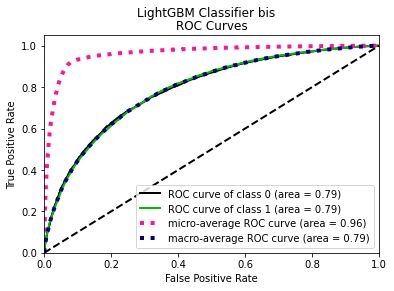

In [70]:
# ROC curve
probas = gbm_clf_bis.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("LightGBM Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\LightGBM\\roc_lightgbm_bis.png", dpi=300)

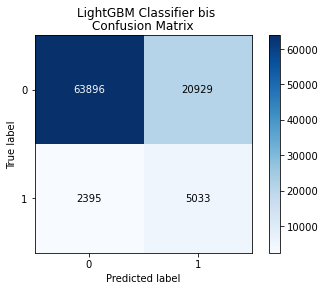

In [71]:
# Confusion matrix
y_pred = (gbm_clf_bis.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("LightGBM Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\LightGBM\\confusion_matrix_lightgbm_bis.png", dpi=300)

In [72]:
# Collecting results
train_model_results['classifier/LightGBM_bis'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [73]:
# The data assigned to the dictionary 
dict={'ID': '9bis', 'Model' : 'classifier/LightGBM_bis', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

#### GridsearchCV

##### LightGBM - ter (after GSCV)

In [74]:
if (class_weigh=="y"):
    
    ### Class weigh
    y_train.value_counts()
    
    # Positive Binary Scaling
    pos = y_train.value_counts()[1]
    neg = y_train.value_counts()[0]
    # https://sites.google.com/view/lauraepp/parameters
    # Multiplication applied to every positive label weight.
    #By performing a weight multiplication on the positive label, the model is performing a cost-sensitive training.
    #The cost-sensitive training is applied to the booster model which impacts directly the trained models.
    #It implies a potential higher performance, especially when it comes to ranking tasks such as for AUC.
    pos_weigh_coef = neg/pos
    
else:
    pos_weigh_coef = None

In [75]:
# LightGBM instance
classifier = LGBMClassifier(
    objective='binary',
    n_estimators=10000, # trees to build
    learning_rate=0.01, # Multiplication performed on each boosting iteration
    max_depth=10, # Maximum tree depth for base learners, <=0 means no limit
    num_leaves = 32, # num_leaves = 2^(max_depth)
    colsample_bytree = 0.2, # Percentage of columns used per iteration
    subsample = 0.9, # (bagging_fraction) you can specify the percentage of rows used per tree building iteration
    min_child_weight = 100,
    random_state=1234)

# Timer start
start_time = timeit.default_timer()

gbm_clf_ter, gbm_clf_ter_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                                folds,
                                                                                                                                X_train_std,
                                                                                                                                y_train,
                                                                                                                                X_val_std,
                                                                                                                                y_val,
                                                                                                                                custom_loss,
                                                                                                                                fbeta,
                                                                                                                                fbeta_number,
                                                                                                                                logistic_regression=False,
                                                                                                                                train_resampling=smote,
                                                                                                                                eval_set=True,
                                                                                                                                scorer='auc',
                                                                                                                                early_stopping_rounds=500,
                                                                                                                                verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.786926	training's binary_logloss: 0.248191	valid_1's auc: 0.759694	valid_1's binary_logloss: 0.253641
[400]	training's auc: 0.804455	training's binary_logloss: 0.236261	valid_1's auc: 0.771367	valid_1's binary_logloss: 0.245366
[600]	training's auc: 0.816971	training's binary_logloss: 0.22959	valid_1's auc: 0.777032	valid_1's binary_logloss: 0.242136
[800]	training's auc: 0.827164	training's binary_logloss: 0.224678	valid_1's auc: 0.780364	valid_1's binary_logloss: 0.240476
[1000]	training's auc: 0.835897	training's binary_logloss: 0.220743	valid_1's auc: 0.782347	valid_1's binary_logloss: 0.239601
[1200]	training's auc: 0.843538	training's binary_logloss: 0.217341	valid_1's auc: 0.783671	valid_1's binary_logloss: 0.239033
[1400]	training's auc: 0.850618	training's binary_logloss: 0.21426	valid_1's auc: 0.784502	valid_1's binary_logloss: 0.238684
[1600]	training's auc: 0.857186	training's binary_logloss: 0.211387	valid_1's auc: 0.785142	valid_1's binary_logloss:

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.785756	training's binary_logloss: 0.248727	valid_1's auc: 0.765899	valid_1's binary_logloss: 0.252006
[400]	training's auc: 0.803397	training's binary_logloss: 0.237057	valid_1's auc: 0.77682	valid_1's binary_logloss: 0.243743
[600]	training's auc: 0.815798	training's binary_logloss: 0.230531	valid_1's auc: 0.781792	valid_1's binary_logloss: 0.240535
[800]	training's auc: 0.826031	training's binary_logloss: 0.225735	valid_1's auc: 0.784672	valid_1's binary_logloss: 0.238939
[1000]	training's auc: 0.834637	training's binary_logloss: 0.221862	valid_1's auc: 0.786458	valid_1's binary_logloss: 0.238065
[1200]	training's auc: 0.842642	training's binary_logloss: 0.218393	valid_1's auc: 0.787737	valid_1's binary_logloss: 0.237488
[1400]	training's auc: 0.849487	training's binary_logloss: 0.215392	valid_1's auc: 0.788507	valid_1's binary_logloss: 0.237151
[1600]	training's auc: 0.855967	training's binary_logloss: 0.212577	valid_1's auc: 0.789225	valid_1's binary_logloss

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.788192	training's binary_logloss: 0.247752	valid_1's auc: 0.758262	valid_1's binary_logloss: 0.253365
[400]	training's auc: 0.804864	training's binary_logloss: 0.236227	valid_1's auc: 0.769214	valid_1's binary_logloss: 0.245642
[600]	training's auc: 0.817017	training's binary_logloss: 0.229607	valid_1's auc: 0.774789	valid_1's binary_logloss: 0.242416
[800]	training's auc: 0.826905	training's binary_logloss: 0.224836	valid_1's auc: 0.778177	valid_1's binary_logloss: 0.240736
[1000]	training's auc: 0.835682	training's binary_logloss: 0.220865	valid_1's auc: 0.780696	valid_1's binary_logloss: 0.239672
[1200]	training's auc: 0.843392	training's binary_logloss: 0.217446	valid_1's auc: 0.782243	valid_1's binary_logloss: 0.239037
[1400]	training's auc: 0.850273	training's binary_logloss: 0.214444	valid_1's auc: 0.783359	valid_1's binary_logloss: 0.238613
[1600]	training's auc: 0.856537	training's binary_logloss: 0.211699	valid_1's auc: 0.78397	valid_1's binary_logloss

C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


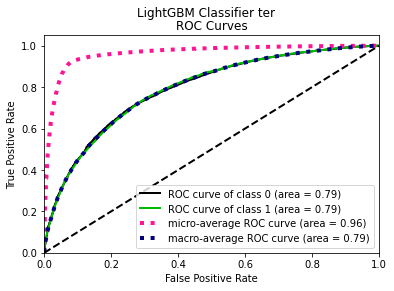

In [76]:
# ROC curve
probas = gbm_clf_ter.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("LightGBM Classifier ter")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\LightGBM\\roc_lightgbm_ter.png", dpi=300)

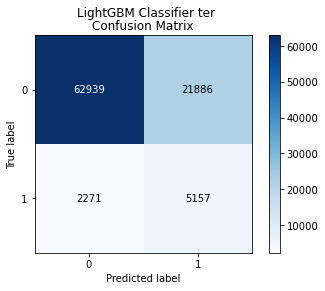

In [77]:
# Confusion matrix
y_pred = (gbm_clf_ter.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("LightGBM Classifier ter")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\LightGBM\\confusion_matrix_lightgbm_ter.png", dpi=300)

In [78]:
# Collecting results
train_model_results['classifier/LightGBM_ter'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [79]:
# The data assigned to the dictionary 
dict={'ID': '9ter', 'Model' : 'classifier/LightGBM_ter', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

### CatBoost

In [80]:
# model instance
classifier = CatBoostClassifier(
    objective="Logloss",
    iterations=5, 
    learning_rate=0.1,
    random_state=1234
) 

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
catB_clf, catB_clf_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                          folds,
                                                                                                                          X_train_std,
                                                                                                                          y_train,
                                                                                                                          X_val_std,
                                                                                                                          y_val,
                                                                                                                          custom_loss,
                                                                                                                          fbeta,
                                                                                                                          fbeta_number, 
                                                                                                                          logistic_regression=False,
                                                                                                                          train_resampling=smote,
                                                                                                                          eval_set=False,
                                                                                                                          scorer='auc',
                                                                                                                          early_stopping_rounds=None,
                                                                                                                          verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

0:	learn: 0.5971247	total: 248ms	remaining: 993ms
1:	learn: 0.5199075	total: 325ms	remaining: 487ms
2:	learn: 0.4632312	total: 399ms	remaining: 266ms
3:	learn: 0.4191044	total: 479ms	remaining: 120ms
4:	learn: 0.3838903	total: 560ms	remaining: 0us
Fold  1 AUC : 0.701890
0:	learn: 0.5922743	total: 86.2ms	remaining: 345ms
1:	learn: 0.5151917	total: 164ms	remaining: 247ms
2:	learn: 0.4576993	total: 236ms	remaining: 157ms
3:	learn: 0.4137192	total: 315ms	remaining: 78.8ms
4:	learn: 0.3802018	total: 391ms	remaining: 0us
Fold  2 AUC : 0.702469
0:	learn: 0.5976103	total: 77.7ms	remaining: 311ms
1:	learn: 0.5226846	total: 155ms	remaining: 233ms
2:	learn: 0.4660125	total: 244ms	remaining: 163ms
3:	learn: 0.4204103	total: 328ms	remaining: 82.1ms
4:	learn: 0.3838247	total: 411ms	remaining: 0us
Fold  3 AUC : 0.702152
Mean cross-validation ROC-AUC score 0.702171
Validation ROC-AUC score 0.719954
Threshold=0.276, Custom loss function (10*fn + fp) score_min=53411.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


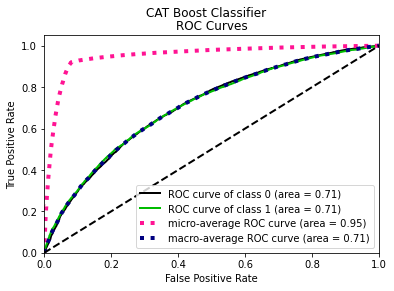

In [81]:
# ROC curve
probas = catB_clf.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("CAT Boost Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\CATBoost\\roc_catboost.png", dpi=300)

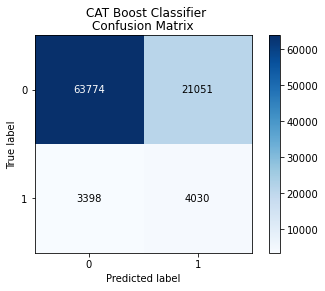

In [82]:
# Confusion matrix
y_pred = (catB_clf.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("CAT Boost Classifier")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\CATBoost\\confusion_matrix_catboost.png", dpi=300)

In [83]:
# Collecting results
train_model_results['classifier/CATBoost'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [84]:
# The data assigned to the dictionary 
dict={'ID': 11, 'Model' : 'classifier/CATBoost', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

#### RandomizedSearchCV

##### CatBoost bis (after RandomizedSearchCV)

In [85]:
# model instance
classifier = CatBoostClassifier(
    objective="Logloss",
    iterations=5, 
    learning_rate=0.1,
    random_state=1234
) 

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
catB_clf_bis, catB_clf_bis_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                                  folds,
                                                                                                                                  X_train_std,
                                                                                                                                  y_train,
                                                                                                                                  X_val_std,
                                                                                                                                  y_val,
                                                                                                                                  custom_loss,
                                                                                                                                  fbeta,
                                                                                                                                  fbeta_number,
                                                                                                                                  logistic_regression=False,
                                                                                                                                  train_resampling=smote,
                                                                                                                                  eval_set=False,
                                                                                                                                  scorer='auc',
                                                                                                                                  early_stopping_rounds=500,
                                                                                                                                  verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

0:	learn: 0.5971247	total: 76.6ms	remaining: 306ms
1:	learn: 0.5199075	total: 169ms	remaining: 253ms
2:	learn: 0.4632312	total: 242ms	remaining: 161ms
3:	learn: 0.4191044	total: 315ms	remaining: 78.6ms
4:	learn: 0.3838903	total: 393ms	remaining: 0us
Fold  1 AUC : 0.701890
0:	learn: 0.5922743	total: 85.8ms	remaining: 343ms
1:	learn: 0.5151917	total: 164ms	remaining: 246ms
2:	learn: 0.4576993	total: 236ms	remaining: 157ms
3:	learn: 0.4137192	total: 314ms	remaining: 78.6ms
4:	learn: 0.3802018	total: 389ms	remaining: 0us
Fold  2 AUC : 0.702469
0:	learn: 0.5976103	total: 76.6ms	remaining: 306ms
1:	learn: 0.5226846	total: 153ms	remaining: 230ms
2:	learn: 0.4660125	total: 229ms	remaining: 152ms
3:	learn: 0.4204103	total: 307ms	remaining: 76.7ms
4:	learn: 0.3838247	total: 390ms	remaining: 0us
Fold  3 AUC : 0.702152
Mean cross-validation ROC-AUC score 0.702171
Validation ROC-AUC score 0.719954
Threshold=0.276, Custom loss function (10*fn + fp) score_min=53411.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


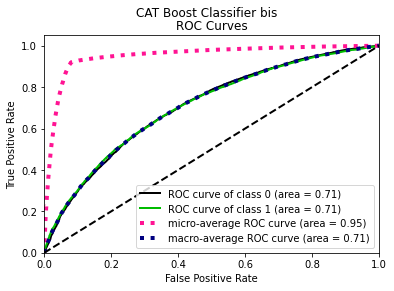

In [86]:
# ROC curve
probas = catB_clf_bis.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("CAT Boost Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\CATBoost\\roc_catboost_bis.png", dpi=300)

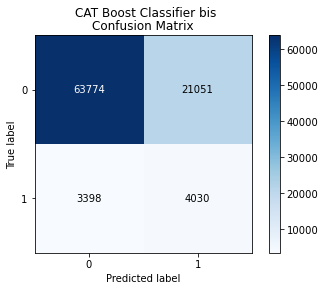

In [87]:
# Confusion matrix
y_pred = (catB_clf_bis.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("CAT Boost Classifier bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\CATBoost\\confusion_matrix_catboost_bis.png", dpi=300)

In [88]:
# Collecting results
train_model_results['classifier/CatBoost_bis'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [89]:
# The data assigned to the dictionary 
dict={'ID': '12bis', 'Model' : 'classifier/CatBoost_bis', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
 
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

### Logistic Regression

In [90]:
# model instance
classifier = LogisticRegression(random_state=1234)

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
logistic_regression=True
log_reg, log_reg_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                        folds,
                                                                                                                        X_train_std,
                                                                                                                        y_train,
                                                                                                                        X_val_std,
                                                                                                                        y_val,
                                                                                                                        custom_loss,
                                                                                                                        fbeta,
                                                                                                                        fbeta_number,
                                                                                                                        logistic_regression=True,
                                                                                                                        train_resampling=smote,
                                                                                                                    eval_set=False,
                                                                                                                        scorer='auc',
                                                                                                                        early_stopping_rounds=500,
                                                                                                                        verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  1 AUC : 0.768761


C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  2 AUC : 0.769104


C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  3 AUC : 0.764701
Mean cross-validation ROC-AUC score 0.767522
Validation ROC-AUC score 0.774785
Threshold=0.094, Custom loss function (10*fn + fp) score_min=46527.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


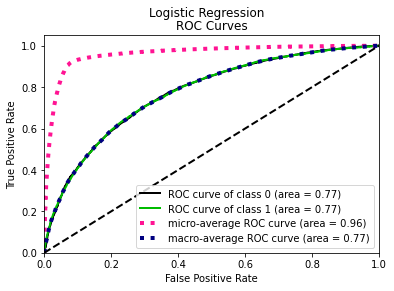

In [91]:
# ROC curve
probas = log_reg.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("Logistic Regression")

# Save

plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\logistic_regression\\roc_curve_logistic_regression.png", dpi=300)

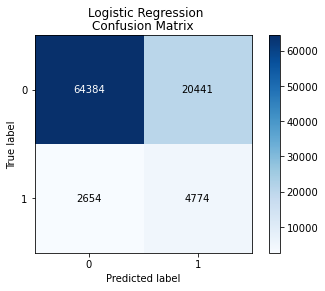

In [92]:
# Confusion matrix
y_pred = (log_reg.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("Logistic Regression")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\logistic_regression\\confusion_matrix_logistic_regression.png", dpi=300)

In [93]:
# Collecting results
train_model_results['classifier/LogisticRegression'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [94]:
# The data assigned to the dictionary 
dict={'ID': 14, 'Model' : 'classifier/LogisticRegression', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

#### RandomizedSearchCV

##### Logistic Regression - bis (after RandomizedSearchCV)

In [25]:
# model instance
classifier = LogisticRegression(
    solver='newton-cg', 
    tol=1e-2, 
    max_iter=200,                  
    C=37.464011884736244,
    penalty='l2',
    random_state=1234
) 

# Timer start
start_time = timeit.default_timer()
    
# k fold classification
logistic_regression=True
lr_bis, lr_bis_importance_df, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, best_score, threshold = kfold_classif(classifier,
                                                                                                                      folds,
                                                                                                                      X_train_std,
                                                                                                                      y_train,
                                                                                                                      X_val_std,
                                                                                                                      y_val,
                                                                                                                      custom_loss,
                                                                                                                      fbeta,
                                                                                                                      fbeta_number,
                                                                                                                      logistic_regression=True,
                                                                                                                      train_resampling=smote,
                                                                                                                      eval_set=False,
                                                                                                                      scorer='auc',
                                                                                                                      early_stopping_rounds=500,
                                                                                                                      verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

Fold  1 AUC : 0.768485
Fold  2 AUC : 0.769274
Fold  3 AUC : 0.765731
Mean cross-validation ROC-AUC score 0.767830
Validation ROC-AUC score 0.775260
Threshold=0.091, Custom loss function (10*fn + fp) score_min=46290.00000


C:\Users\vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


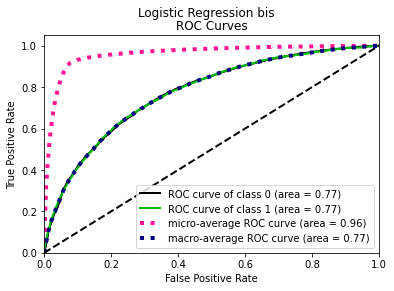

In [26]:
# ROC curve
probas = lr_bis.predict_proba(X_val_std)
skplt.metrics.plot_roc_curve(y_val.values, probas)

# Tittle
plt.suptitle("Logistic Regression bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\logistic_regression\\roc_curve_logistic_regression_bis.png", dpi=300)

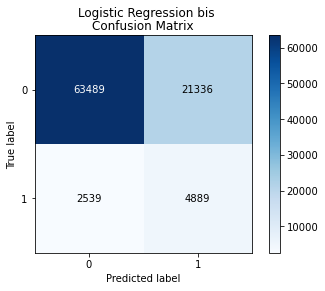

In [27]:
# Confusion matrix
y_pred = (lr_bis.predict_proba(X_val_std)[:,1] >= threshold).astype(bool)
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

# Tittle
plt.suptitle("Logistic Regression bis")

# Save
plt.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\logistic_regression\\confusion_matrix_logistic_regression_bis.png", dpi=300)

In [28]:
# Collecting results
train_model_results['classifier/LogisticRegression_bis'] = [elapsed, mean_crossvalid_fold_ROC_AUC, validation_ROC_AUC, threshold, best_score]

In [29]:
# The data assigned to the dictionary 
dict={'ID': '15bis', 'Model' : 'classifier/LogisticRegression_bis', 'Computing_time' : elapsed, 'mean_crossvalid_fold_ROC_AUC' : mean_crossvalid_fold_ROC_AUC,
      'Validation_ROC_AUC' : validation_ROC_AUC, 'Optimized_threshold' : threshold, 'best_score' : best_score, 'custom_loss': custom_loss,
      'fbeta': fbeta_number, 'splits': splits}
  
# Pre-requisite - The CSV file should be manually closed before running this code.

# First, open the old CSV file in append mode, hence mentioned as 'a'
# Then, for the CSV file, create a file object
with open(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv", 'a', newline='') as f_object:
    # Pass the CSV  file object to the Dictwriter() function
    # Result - a DictWriter object
    dictwriter_object = DictWriter(f_object, fieldnames=headersCSV)
    # Pass the data in the dictionary as an argument into the writerow() function
    dictwriter_object.writerow(dict)
    # Close the file object
    f_object.close()

### Results figures

    > Headers to put in the csv file:
Model,Computing_time,mean_crossvalid_fold_ROC_AUC,Validation_ROC_AUC,Optimized_threshold,best_score,custom_loss,fbeta,splits


In [33]:
# Reading csv 
train_model_results_df = pd.read_csv(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\modeling_results.csv",sep = ',')
train_model_results_df

,Model,Computing_time,mean_crossvalid_fold_ROC_AUC,Validation_ROC_AUC,Optimized_threshold,best_score,custom_loss,fbeta,splits
2,classifier/DecisionTree,33.343470,0.682272,0.693390,0.093,55241,y,0,3
2bis,classifier/DecisionTree_bis,10.512875,0.591410,0.599801,0.088,66359,y,0,3
4,classifier/RandomForest,558.126662,0.707107,0.724085,0.121,52678,y,0,3
4bis,classifier/RandomForest_bis,183.272545,0.717926,0.721813,0.086,53405,y,0,3
6,classifier/XGBoost,171.572227,0.767056,0.784620,0.080,45401,y,0,3
7bis,classifier/XGBoost_bis,836.186358,0.763551,0.780948,0.079,45932,y,0,3
8,classifier/LightGBM,52.690732,0.774703,0.785820,0.084,45272,y,0,3
9bis,classifier/LightGBM_bis,639.744899,0.785173,0.794104,0.084,44159,y,0,3
9ter,classifier/LightGBM_ter,247.030287,0.787555,0.794534,0.083,43944,y,0,3
11,classifier/CATBoost,12.091107,0.702171,0.719954,0.276,53411,y,0,3


#### mean_crossvalid_fold_ROC_AUC

In [34]:
df_a = train_model_results_df.sort_values(by=['Validation_ROC_AUC'], ascending=False)
df_a

,Model,Computing_time,mean_crossvalid_fold_ROC_AUC,Validation_ROC_AUC,Optimized_threshold,best_score,custom_loss,fbeta,splits
9ter,classifier/LightGBM_ter,247.030287,0.787555,0.794534,0.083,43944,y,0,3
9bis,classifier/LightGBM_bis,639.744899,0.785173,0.794104,0.084,44159,y,0,3
8,classifier/LightGBM,52.690732,0.774703,0.785820,0.084,45272,y,0,3
6,classifier/XGBoost,171.572227,0.767056,0.784620,0.080,45401,y,0,3
7bis,classifier/XGBoost_bis,836.186358,0.763551,0.780948,0.079,45932,y,0,3
15bis,classifier/LogisticRegression_bis,3682.701676,0.767830,0.775260,0.091,46290,y,0,3
14,classifier/LogisticRegression,45.645415,0.767522,0.774785,0.094,46527,y,0,3
4,classifier/RandomForest,558.126662,0.707107,0.724085,0.121,52678,y,0,3
4bis,classifier/RandomForest_bis,183.272545,0.717926,0.721813,0.086,53405,y,0,3
11,classifier/CATBoost,12.091107,0.702171,0.719954,0.276,53411,y,0,3


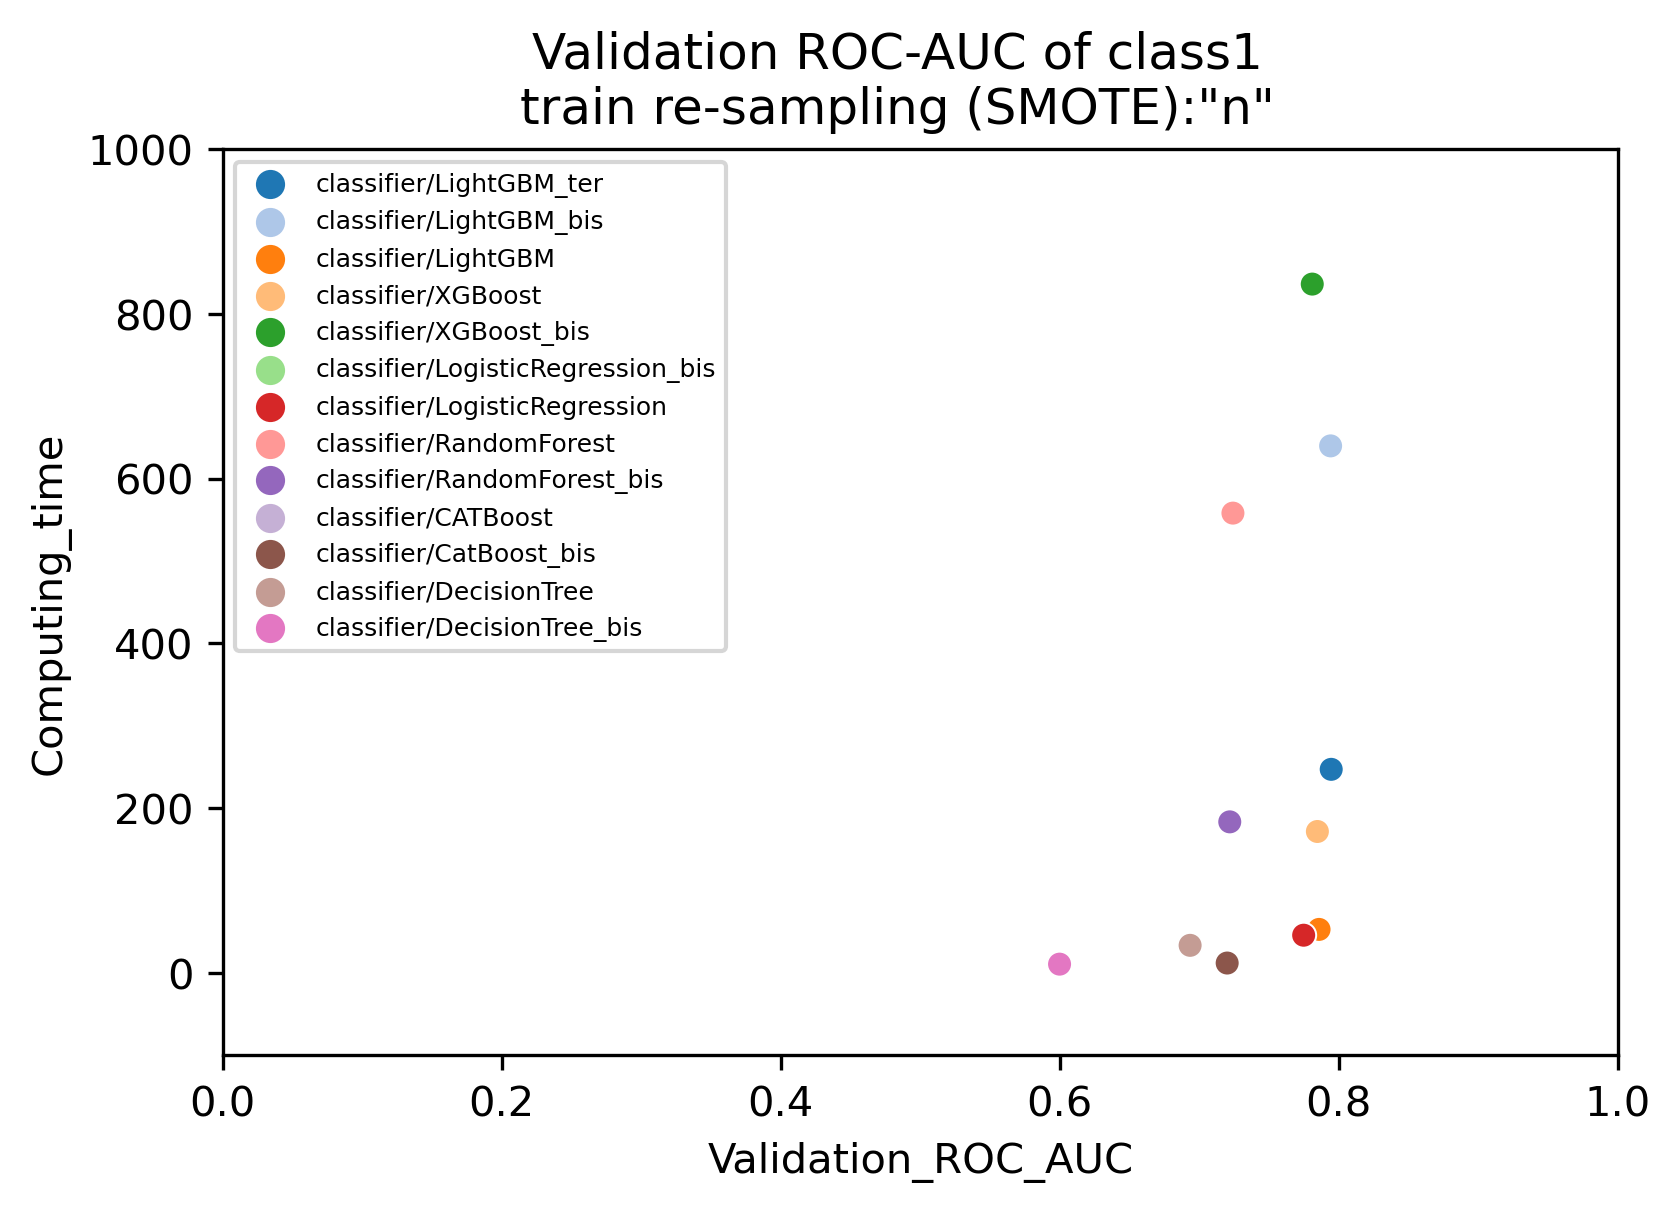

In [35]:
# Scatter plot of the results (AUC class 1)
my_pal = sns.color_palette("tab20", n_colors = df_a.shape[0])

# Fig, ax
fig, ax = plt.subplots(1, 1, dpi=300)
sns.scatterplot(data=df_a, x="Validation_ROC_AUC", y="Computing_time", hue=df_a.Model, 
                palette=my_pal, 
                legend='full')

# Suptitle
fig.suptitle('Validation ROC-AUC of class1\n'
            f'train re-sampling (SMOTE):"{smote}"')

# Legend size and position
plt.legend(loc='upper left', prop={'size': 6})

# Ticks
plt.xlim((0, 1))
plt.ylim((-100, 1000))

# texting
#for i in range(df_a.shape[0]):
#    plt.text(df_a['Validation_ROC_AUC'].iloc[i],
#             df_a['Computing_time'].iloc[i],
#             df_a['Model'].iloc[i], size=5)

# Save
fig.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\Validation_ROC_AUC.png", dpi=300)

#### best_score

In [36]:
df_b = train_model_results_df.sort_values(by=['mean_crossvalid_fold_ROC_AUC'], ascending=False)
df_b = df_b[df_b['mean_crossvalid_fold_ROC_AUC'].notna()]
df_b

,Model,Computing_time,mean_crossvalid_fold_ROC_AUC,Validation_ROC_AUC,Optimized_threshold,best_score,custom_loss,fbeta,splits
9ter,classifier/LightGBM_ter,247.030287,0.787555,0.794534,0.083,43944,y,0,3
9bis,classifier/LightGBM_bis,639.744899,0.785173,0.794104,0.084,44159,y,0,3
8,classifier/LightGBM,52.690732,0.774703,0.785820,0.084,45272,y,0,3
15bis,classifier/LogisticRegression_bis,3682.701676,0.767830,0.775260,0.091,46290,y,0,3
14,classifier/LogisticRegression,45.645415,0.767522,0.774785,0.094,46527,y,0,3
6,classifier/XGBoost,171.572227,0.767056,0.784620,0.080,45401,y,0,3
7bis,classifier/XGBoost_bis,836.186358,0.763551,0.780948,0.079,45932,y,0,3
4bis,classifier/RandomForest_bis,183.272545,0.717926,0.721813,0.086,53405,y,0,3
4,classifier/RandomForest,558.126662,0.707107,0.724085,0.121,52678,y,0,3
11,classifier/CATBoost,12.091107,0.702171,0.719954,0.276,53411,y,0,3


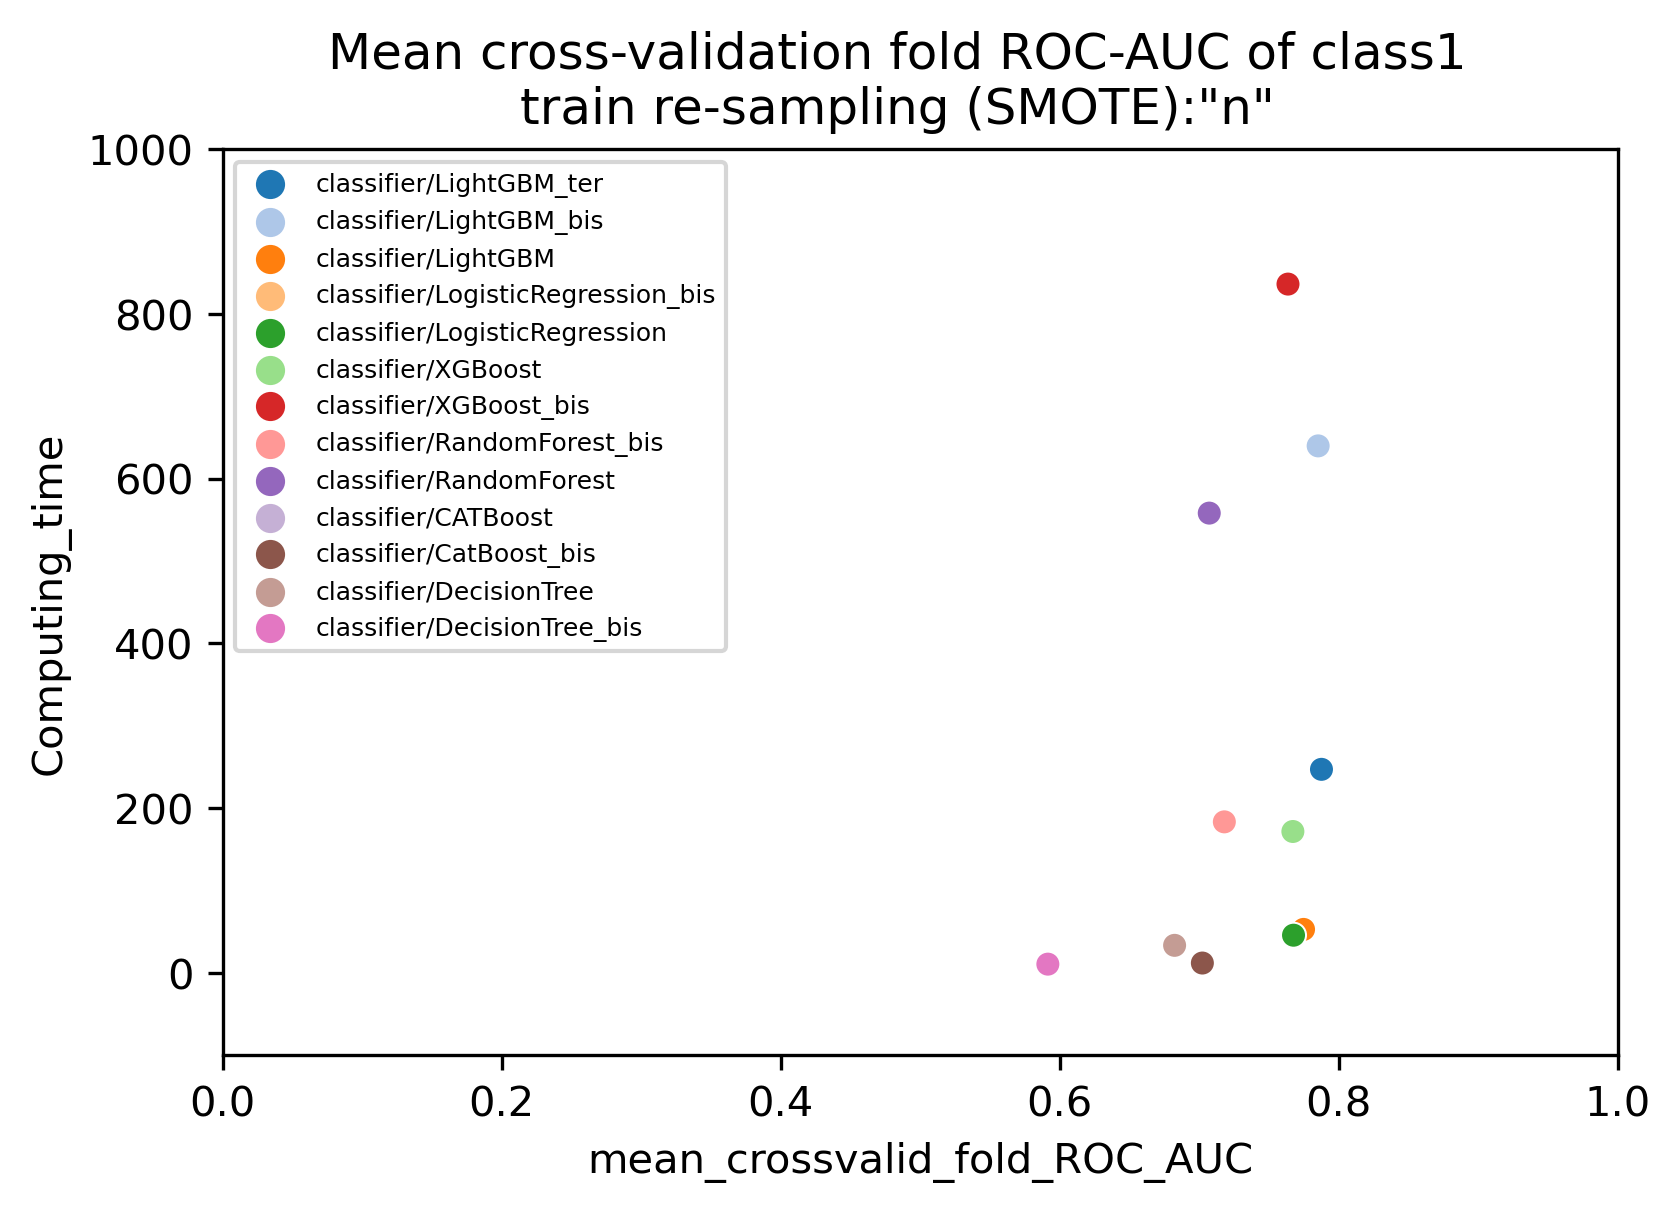

In [37]:
# Scatter plot of the results (AUC class 1)
my_pal = sns.color_palette("tab20", n_colors = df_b.shape[0])

# Fig, ax
fig, ax = plt.subplots(1, 1, dpi=300)
sns.scatterplot(data=df_b, x="mean_crossvalid_fold_ROC_AUC", y="Computing_time", hue=df_b['Model'], 
                palette=my_pal, 
                legend='full')

# Suptitle
fig.suptitle('Mean cross-validation fold ROC-AUC of class1\n'
            f'train re-sampling (SMOTE):"{smote}"')

# Legend size and position
plt.legend(loc='upper left', prop={'size': 6})

# Ticks
plt.xlim((0, 1))
plt.ylim((-100, 1000))

# Save
fig.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\Mean_validation_fold_AUC_of_class1.png", dpi=300)

#### best_score

In [38]:
df_c = train_model_results_df.sort_values(by=['best_score'], ascending=True)
df_c = df_c[df_c['best_score'].notna()]
df_c

,Model,Computing_time,mean_crossvalid_fold_ROC_AUC,Validation_ROC_AUC,Optimized_threshold,best_score,custom_loss,fbeta,splits
9ter,classifier/LightGBM_ter,247.030287,0.787555,0.794534,0.083,43944,y,0,3
9bis,classifier/LightGBM_bis,639.744899,0.785173,0.794104,0.084,44159,y,0,3
8,classifier/LightGBM,52.690732,0.774703,0.785820,0.084,45272,y,0,3
6,classifier/XGBoost,171.572227,0.767056,0.784620,0.080,45401,y,0,3
7bis,classifier/XGBoost_bis,836.186358,0.763551,0.780948,0.079,45932,y,0,3
15bis,classifier/LogisticRegression_bis,3682.701676,0.767830,0.775260,0.091,46290,y,0,3
14,classifier/LogisticRegression,45.645415,0.767522,0.774785,0.094,46527,y,0,3
4,classifier/RandomForest,558.126662,0.707107,0.724085,0.121,52678,y,0,3
4bis,classifier/RandomForest_bis,183.272545,0.717926,0.721813,0.086,53405,y,0,3
11,classifier/CATBoost,12.091107,0.702171,0.719954,0.276,53411,y,0,3


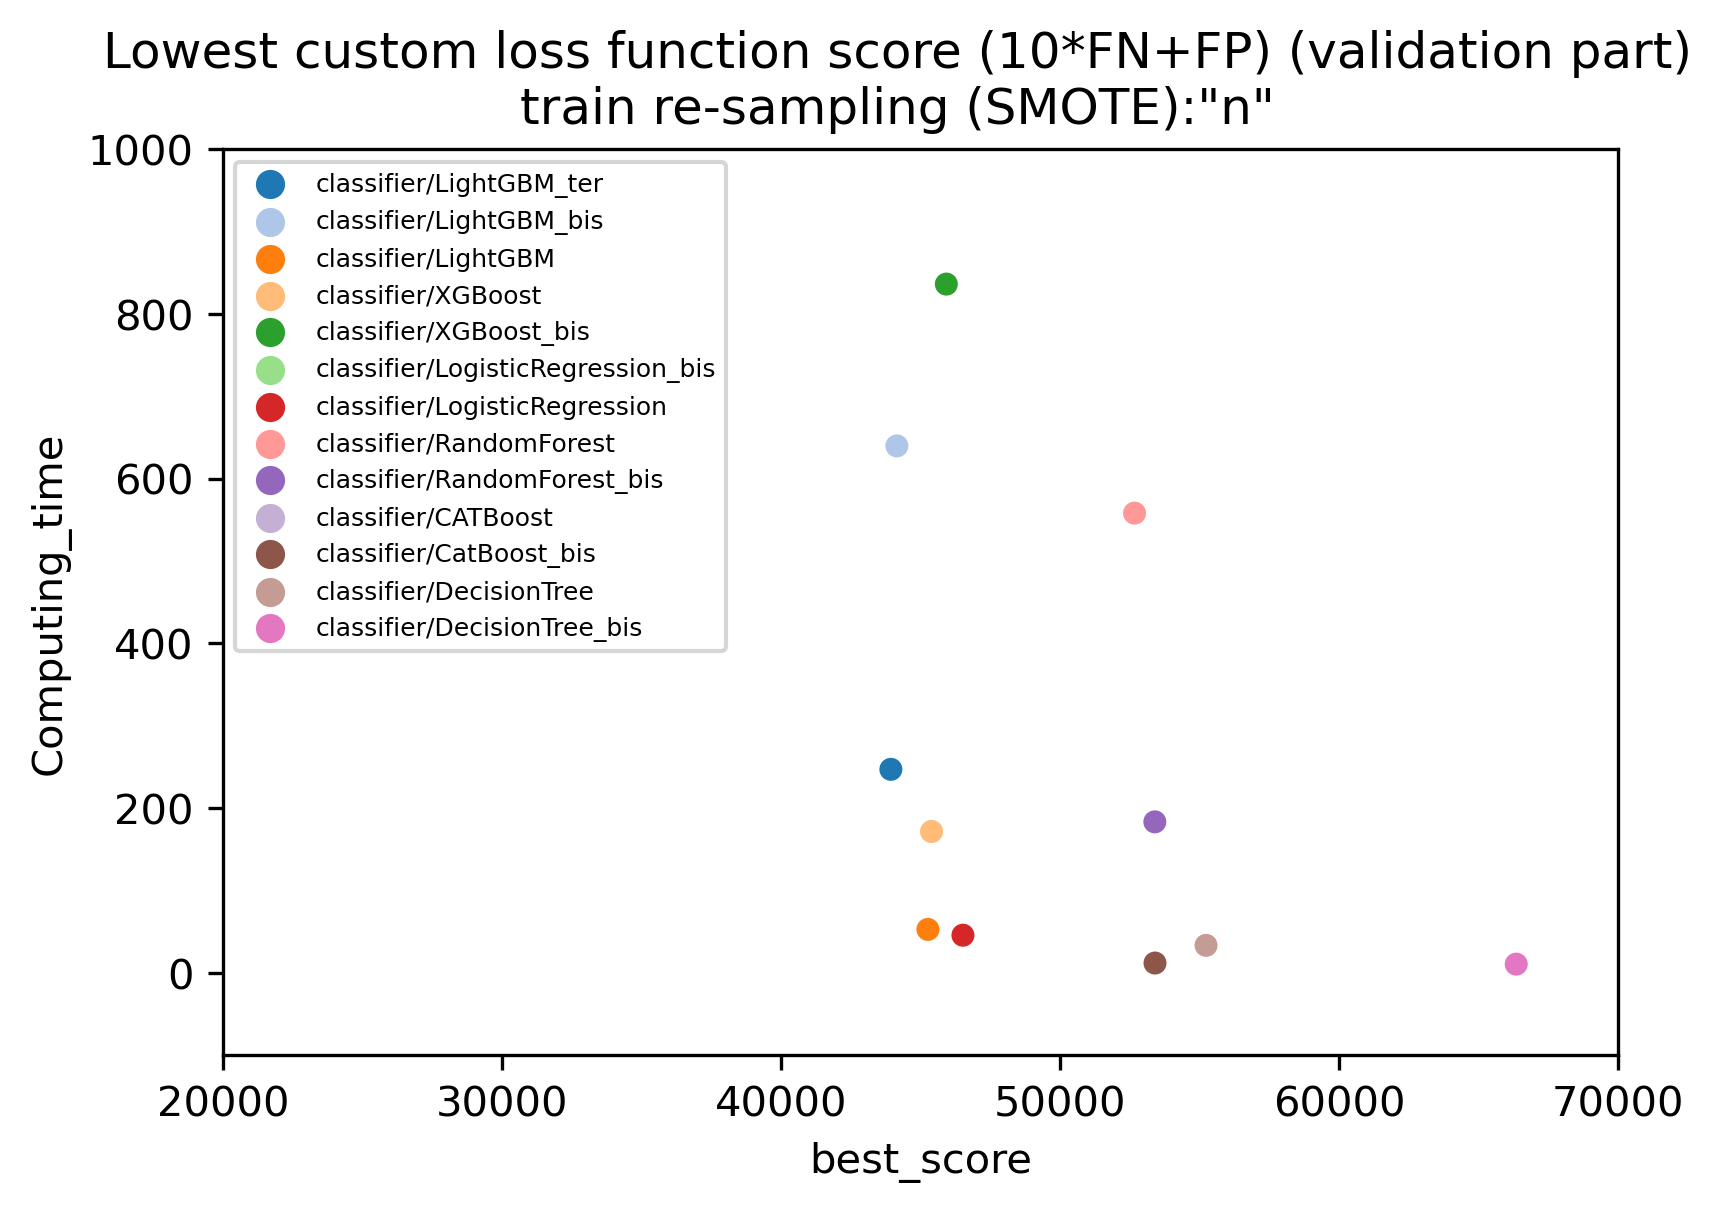

In [39]:
# Scatter plot of the results (AUC class 1)
my_pal = sns.color_palette("tab20", n_colors = df_c.shape[0])

# Fig, ax
fig, ax = plt.subplots(1, 1, dpi=300)
sns.scatterplot(data=df_c, x="best_score", y="Computing_time", hue=df_c['Model'], 
                palette=my_pal, 
                legend='full')

# title config:
if fbeta==True:
    # Suptitle
    fig.suptitle(f'Best f{fbeta_number} score (validation part)\n'
                f'train re-sampling (SMOTE):"{smote}"')
    
# title config:
if custom_loss=='y':
    # Suptitle
    fig.suptitle(f'Lowest custom loss function score (10*FN+FP) (validation part)\n'
                f'train re-sampling (SMOTE):"{smote}"')

# Legend size and position
plt.legend(loc='upper left', prop={'size': 6})


if custom_loss=='y':
    # Ticks
    plt.xlim((20000, 70000))
    plt.ylim((-100, 1000))
else:
    # Ticks
    plt.xlim((0, 1))
    plt.ylim((-100, 1000))
    
    
    
# Save
if fbeta==True:
    fig.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\performance_f{fbeta_number}.png", dpi=300)
    
if custom_loss=='y':
    fig.savefig(f"projets\\07_loan_customer_scoring\\production\\savefig\\model_test_{smote_case}\\model_results\\{rfe_case}\\{class_weigh_case}\\performance_custom_loss_function.png", dpi=300) 

# TEST SUBMISSION (mixed aggregation)

The validation and test data are aggregated together in the same process then studied separately

In [6]:
import pandas as pd
from scipy import stats
import gc as gc
from sklearn import preprocessing
import timeit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, fbeta_score, confusion_matrix, f1_score
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns

import json

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import of cleaning functions
from cleaning59 import na_rows_list, na_raw_drop_df, min_row_data_rate_list, min_row_data_rate_df, column_data_rate, column_data_rate_mean, columns_not_in_list, columns_delete_df, min_column_data_rate_df, low_outlier_filter_df, high_outlier_filter_df, dic_high_outlier_filter_df, word_column_filter_df, word_column_filter_lst, sign_invert_filter_df, common_elements, separate_elements 

In [4]:
# Import of graph functions
from plotting03 import bi_joint_plot

In [5]:
# Import of ML functions
from ML20 import OneHotEncoder, label_encoding_transform_with_merge, target_encoding_transform_with_merge, vector_encoding_transform_with_merge, encoding_transform_with_merge, kfold_classif

In [6]:
# Import feature engineering module from a Kaggle script

# importing sys
import sys
  
# adding 'loan_customer_scoring' to the system path
sys.path.append('scripts\\loan_customer_scoring\\')

from data_aggregation_2 import*

## Function

In [47]:
def kfold_classif_sub(classifier, folds, df_train_std, target_train, df_val_std, train_resampling='n', eval_set=False,
                  scorer='auc', early_stopping_rounds=None, verbose=200):
    """K_fold training/validation for DecisionTree/RandomForest/LightGBM/XGBoost/CATBoost/LogisticRegression,
    train_resampling-> borderline smote re-sampling on the train part,
    fbetanumber-> for function to optimize"""

    # Create arrays and dataframes to store results
    crossvalid_probas = np.zeros(df_train_std.shape[0])
    valid_probas = np.zeros(df_val_std.shape[0]) 
    fold_AUC_list = []
    feature_importance_df = pd.DataFrame()
    feats = [f for f in df_train_std.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

    # Modification of columns
    df_train_std_2 = df_train_std[feats]
    df_val_std_2 = df_val_std[feats]
    df_train_std_2.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_train_std_2.columns]
    df_val_std_2.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_val_std_2.columns]

    # define thresholds
    thresholds = np.arange(0, 1, 0.001)
    # apply threshold to positive probabilities to create labels
    def to_labels(pos_probs, threshold):
        return (pos_probs >= threshold).astype('int')
    
    def custom_cost_function(testy, yhat):
        # get the fn and the fp from the confusion matrix
        tn, fp, fn, tp = confusion_matrix(testy, yhat).ravel()
        # function
        y = 10*fn + fp
        return y
        
    # data from each fold
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(df_train_std_2, target_train)):
        train_x, train_y = df_train_std_2.iloc[train_idx], target_train.iloc[train_idx]
        valid_x, valid_y = df_train_std_2.iloc[valid_idx], target_train.iloc[valid_idx]   
        
        # Re-sampling 
        if train_resampling=='y':
            # summarize class distribution
            counter = Counter(train_y)
            print('Fold %2d, original distribution: ' % (n_fold + 1))
            print(counter)
            
            # transform the dataset
            oversample = BorderlineSMOTE()
            train_x, train_y = oversample.fit_resample(train_x, train_y)
            # summarize the new class distribution
            counter = Counter(train_y)
            print('Fold %2d, re-sampled distribution: ' % (n_fold + 1))
            print(counter)
     
        # classifier instance
        clf = classifier

        # fitting
        if eval_set==True:
            clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric=scorer, verbose=verbose, early_stopping_rounds=early_stopping_rounds)
        
        if eval_set==False:
            clf.fit(train_x, train_y)

        # validation
        crossvalid_probas[valid_idx] = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_)[:, 1]
        
        # ROC-AUC
        AUC = roc_auc_score(valid_y, crossvalid_probas[valid_idx])
        fold_AUC_list.append(AUC)

        # showing results from each fold
        print('Fold %2d AUC : %.6f' % (n_fold + 1, AUC))
           
        # Collecting results
        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = feats

        fold_importance_df["importance"] = clf.feature_importances_
            
        fold_importance_df["fold"] = n_fold + 1
        fold_importance_df["val_fold_AUC"] = AUC
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
              
        #validation_ROC_AUC = roc_auc_score(target_train, crossvalid_probas)
        valid_probas += clf.predict_proba(df_val_std, num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits    
                 
        del train_x, train_y, valid_x, valid_y
        gc.collect()

    # Final performance
    mean_crossvalid_fold_ROC_AUC = sum(fold_AUC_list)/len(fold_AUC_list)
    print('Mean cross-validation ROC-AUC score %.6f' % mean_crossvalid_fold_ROC_AUC)
    
    return valid_probas
    
    

## Data reading

In [8]:
# data reading and viewing
df_application_train = pd.read_csv("projets\\07_loan_customer_scoring\\application_train.csv",sep=',',dtype='object')
df_application_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# data reading and viewing
df_application_test = pd.read_csv("projets\\07_loan_customer_scoring\\application_test.csv",sep=',',dtype='object')
df_application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [10]:
# Comparing columns
for c in df_application_test.columns:
    if c not in df_application_train.columns:
        print(c)

In [11]:
# Comparing columns
for c in df_application_train.columns:
    if c not in df_application_test.columns:
        print(c)

TARGET


## Data aggregation

In [12]:
df = main()

Train samples: 307511, test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 16s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 19s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 9s
Installments payments df shape: (339587, 26)
Process installments payments - done in 19s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 16s


### Data cleaning

In [13]:
# Check of infinite values

print("Infinite values detected: ")

for variable in df.columns:
    if len(np.isinf(df[variable]).value_counts())>1:
        print(f"\n{variable}")
        print(np.isinf(df[variable]).value_counts().iloc[1])
    else:
        None

Infinite values detected: 

PREV_APP_CREDIT_PERC_MAX
1

REFUSED_APP_CREDIT_PERC_MAX
1

INSTAL_PAYMENT_PERC_MAX
19


In [14]:
# Replacing infinte values by NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
# Filling rate by column
column_data_rate_mean(df)

0.7463842074850298

### Data transformation

In [16]:
# Defining the targets
y = df['TARGET']

In [17]:
# keeping loan ID
z = df['SK_ID_CURR']

In [18]:
df_train = df[df['TARGET'].notna()]
y_train = df_train['TARGET']
df_test = df[df['TARGET'].isna()]

In [19]:
# keeping loan ID
z_test = df_test['SK_ID_CURR']
z_test

307511    100001
307512    100005
307513    100013
307514    100028
307515    100038
           ...  
356250    456221
356251    456222
356252    456223
356253    456224
356254    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

In [20]:
df_train.drop(['TARGET'], axis=1, inplace=True)
df_test.drop(['TARGET'], axis=1, inplace=True)

C:\Users\vince\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
# Create arrays and dataframes to store results
feats = [f for f in df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

# Modification of columns
df_test = df_test[feats]
df_train = df_train[feats]
df_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_test.columns]
df_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_train.columns]

In [22]:
# Mean filling rate by column
column_data_rate_mean(df_train)

0.7400742342358799

In [23]:
# Mean filling rate by column
column_data_rate_mean(df_test)

0.7804546045725232

### Imputation train

In [24]:
# Imputation

median_imputation_train = {}
zero_imputation_train = {}

for variable in df_train.columns:
    if df_train[variable].notna().mean() >= 0.65:
        median_value = df_train[variable].median()
        df_train.loc[df_train[variable].isna(), variable] = median_value
        
        # saving in a dictionnary
        median_imputation_train[variable] = median_value
        
        # saving in a json file
        tf = open("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\cleaning\\dictionary_median_imputation_train.json", "w")
        json.dump(median_imputation_train,tf)
        tf.close()
        
    else:
        df_train.loc[df_train[variable].isna(), variable] = 0
        
        # saving in a dictionnary
        zero_imputation_train[variable] = 0
        
        # saving in a json file
        tf = open("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\cleaning\\dictionary_zero_imputation_train.json", "w")
        json.dump(zero_imputation_train,tf)
        tf.close()

In [25]:
len(median_imputation_train)

548

In [26]:
len(zero_imputation_train)

247

In [27]:
# Filling rate by column
column_data_rate_mean(df_train)

1.0

### Imputation test

In [28]:
# Imputation

median_imputation = []
zero_imputation = []

# loading median values from the training part from a json file
tf = open("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\cleaning\\dictionary_median_imputation_train.json", "r")
median_imputation_train = json.load(tf)

for variable in df_test.columns:
    if df_test[variable].notna().mean() >= 0.65:
        if variable in median_imputation_train.keys():
        
            df_test.loc[df_test[variable].isna(), variable] = median_imputation_train[variable]
            median_imputation.append(variable)
        else:
            df_test.loc[df_test[variable].isna(), variable] = 0
        zero_imputation.append(variable)
            
    else:
        df_test.loc[df_test[variable].isna(), variable] = 0
        zero_imputation.append(variable)

In [29]:
len(median_imputation)

548

In [30]:
len(zero_imputation)

795

In [31]:
# Filling rate by column
column_data_rate_mean(df_train)

1.0

### Standardization

In [32]:
# Data standardization
std_scale = preprocessing.StandardScaler().fit(df_train)
X_train = std_scale.transform(df_train)

# Creation of a dataframe to keep the feature names
df_train = pd.DataFrame(X_train, columns=df_train.columns)
df_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,-1.388162,-0.717910,-0.664538,-0.577534,0.142129,-0.478099,-0.166149,-0.507239,-0.149444,1.506889,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
1,0.720377,-0.717910,1.504806,-0.577534,0.426790,1.725436,0.592674,1.600865,-1.252739,-0.166814,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
2,-1.388162,1.392932,-0.664538,-0.577534,-0.427192,-1.152889,-1.404670,-1.092146,-0.783441,-0.689503,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
3,0.720377,-0.717910,-0.664538,-0.577534,-0.142532,-0.711433,0.177867,-0.653466,-0.928980,-0.680108,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.183500
4,-1.388162,-0.717910,-0.664538,-0.577534,-0.199464,-0.213740,-0.361754,-0.068558,0.563577,-0.892529,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,-1.388162,-0.717910,1.504806,-0.577534,-0.047645,-0.855492,0.031008,-0.848435,0.845402,1.537595,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
307503,0.720377,-0.717910,-0.664538,-0.577534,-0.408215,-0.818597,-1.042335,-0.848435,0.310600,-1.085701,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
307504,0.720377,-0.717910,-0.664538,-0.577534,-0.066622,0.195371,0.198049,0.126411,-1.147109,0.245425,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
307505,0.720377,-0.717910,-0.664538,-0.577534,0.009288,-0.568761,-0.476323,-0.592538,-1.124624,0.934017,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318


In [33]:
# Data standardization
X_test = std_scale.transform(df_test)
X_test

# Creation of a dataframe to keep the feature names
df_test = pd.DataFrame(X_test, columns=df_test.columns)
df_test

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0.720377,-0.717910,-0.664538,-0.577534,-0.142532,-0.075104,-0.451794,-0.239156,-0.145901,-0.734187,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
1,-1.388162,-0.717910,-0.664538,-0.577534,-0.294351,-0.934828,-0.671928,-0.970291,1.079003,-0.464479,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
2,-1.388162,1.392932,-0.664538,-0.577534,0.142129,0.159594,2.943970,0.248267,-0.127754,-0.916818,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,3.488777
3,0.720377,-0.717910,-0.664538,2.192098,0.616564,2.424822,1.511707,2.807237,0.399384,0.472282,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,1.571033
4,-1.388162,1.392932,1.504806,0.807282,0.047242,0.065769,0.342113,0.236081,-0.783441,0.686765,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.720377,-0.717910,-0.664538,-0.577534,-0.199464,-0.463285,-0.664786,-0.726579,-1.361116,-0.901236,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
48740,0.720377,-0.717910,1.504806,2.192098,-0.047645,0.058099,0.331246,-0.117301,1.079003,1.111607,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
48741,0.720377,1.392932,-0.664538,0.807282,0.142129,-0.705675,0.420666,-0.604723,0.399384,0.026358,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
48742,-1.388162,-0.717910,1.504806,-0.577534,0.237016,-0.370265,-0.136653,-0.239156,-0.145901,0.474115,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318


## Folds

In [34]:
# define evaluation
folds = KFold(n_splits=10, shuffle=True, random_state=1)

## Modeling

In [36]:
smote='n'

# LightGBM instance
classifier = LGBMClassifier(
    objective='binary',
    n_estimators=10000, # trees to build
    learning_rate=0.01, # Multiplication performed on each boosting iteration
    max_depth=10, # Maximum tree depth for base learners, <=0 means no limit
    num_leaves = 32, # num_leaves = 2^(max_depth)
    colsample_bytree = 0.2, # Percentage of columns used per iteration
    subsample = 0.9, # (bagging_fraction) you can specify the percentage of rows used per tree building iteration
    min_child_weight = 100,
    random_state=1234)

# Timer start
start_time = timeit.default_timer()

sub_prob = kfold_classif_sub(classifier,
                             folds,
                             df_train,
                             y_train,
                             df_test,
                             train_resampling=smote,
                             eval_set=True,
                             scorer='auc',
                             early_stopping_rounds=500,
                             verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779966	training's binary_logloss: 0.249544	valid_1's auc: 0.771462	valid_1's binary_logloss: 0.247366
[400]	training's auc: 0.793947	training's binary_logloss: 0.239447	valid_1's auc: 0.781113	valid_1's binary_logloss: 0.239246
[600]	training's auc: 0.803478	training's binary_logloss: 0.234061	valid_1's auc: 0.78557	valid_1's binary_logloss: 0.235935
[800]	training's auc: 0.810961	training's binary_logloss: 0.230376	valid_1's auc: 0.788004	valid_1's binary_logloss: 0.234322
[1000]	training's auc: 0.817328	training's binary_logloss: 0.227503	valid_1's auc: 0.789539	valid_1's binary_logloss: 0.233419
[1200]	training's auc: 0.823143	training's binary_logloss: 0.225048	valid_1's auc: 0.790633	valid_1's binary_logloss: 0.232872
[1400]	training's auc: 0.828401	training's binary_logloss: 0.222868	valid_1's auc: 0.791556	valid_1's binary_logloss: 0.232464
[1600]	training's auc: 0.833159	training's binary_logloss: 0.220891	valid_1's auc: 0.792424	valid_1's binary_logloss

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.778842	training's binary_logloss: 0.24995	valid_1's auc: 0.7629	valid_1's binary_logloss: 0.251657
[400]	training's auc: 0.793932	training's binary_logloss: 0.239272	valid_1's auc: 0.774077	valid_1's binary_logloss: 0.243182
[600]	training's auc: 0.803601	training's binary_logloss: 0.233751	valid_1's auc: 0.78027	valid_1's binary_logloss: 0.23954
[800]	training's auc: 0.811175	training's binary_logloss: 0.230046	valid_1's auc: 0.783835	valid_1's binary_logloss: 0.237761
[1000]	training's auc: 0.81761	training's binary_logloss: 0.227175	valid_1's auc: 0.786243	valid_1's binary_logloss: 0.236705
[1200]	training's auc: 0.823214	training's binary_logloss: 0.224748	valid_1's auc: 0.787767	valid_1's binary_logloss: 0.236077
[1400]	training's auc: 0.82838	training's binary_logloss: 0.222557	valid_1's auc: 0.788881	valid_1's binary_logloss: 0.235641
[1600]	training's auc: 0.833112	training's binary_logloss: 0.220619	valid_1's auc: 0.789833	valid_1's binary_logloss: 0.23

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779149	training's binary_logloss: 0.249213	valid_1's auc: 0.771204	valid_1's binary_logloss: 0.254802
[400]	training's auc: 0.793633	training's binary_logloss: 0.238952	valid_1's auc: 0.783012	valid_1's binary_logloss: 0.245504
[600]	training's auc: 0.803262	training's binary_logloss: 0.233613	valid_1's auc: 0.789338	valid_1's binary_logloss: 0.241424
[800]	training's auc: 0.810634	training's binary_logloss: 0.229969	valid_1's auc: 0.793199	valid_1's binary_logloss: 0.239162
[1000]	training's auc: 0.816954	training's binary_logloss: 0.227106	valid_1's auc: 0.795602	valid_1's binary_logloss: 0.237831
[1200]	training's auc: 0.822608	training's binary_logloss: 0.224682	valid_1's auc: 0.797396	valid_1's binary_logloss: 0.236947
[1400]	training's auc: 0.827798	training's binary_logloss: 0.222534	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.236354
[1600]	training's auc: 0.832594	training's binary_logloss: 0.220578	valid_1's auc: 0.799556	valid_1's binary_loglos

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779432	training's binary_logloss: 0.249345	valid_1's auc: 0.76493	valid_1's binary_logloss: 0.254867
[400]	training's auc: 0.794426	training's binary_logloss: 0.238882	valid_1's auc: 0.776585	valid_1's binary_logloss: 0.246291
[600]	training's auc: 0.804056	training's binary_logloss: 0.233369	valid_1's auc: 0.782282	valid_1's binary_logloss: 0.242657
[800]	training's auc: 0.81145	training's binary_logloss: 0.229685	valid_1's auc: 0.785459	valid_1's binary_logloss: 0.240836
[1000]	training's auc: 0.817743	training's binary_logloss: 0.226828	valid_1's auc: 0.787604	valid_1's binary_logloss: 0.239784
[1200]	training's auc: 0.823358	training's binary_logloss: 0.224419	valid_1's auc: 0.789082	valid_1's binary_logloss: 0.239122
[1400]	training's auc: 0.828535	training's binary_logloss: 0.222246	valid_1's auc: 0.79043	valid_1's binary_logloss: 0.238591
[1600]	training's auc: 0.833189	training's binary_logloss: 0.220317	valid_1's auc: 0.791242	valid_1's binary_logloss: 

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.780496	training's binary_logloss: 0.248628	valid_1's auc: 0.762275	valid_1's binary_logloss: 0.255183
[400]	training's auc: 0.794421	training's binary_logloss: 0.238619	valid_1's auc: 0.772097	valid_1's binary_logloss: 0.247489
[600]	training's auc: 0.803812	training's binary_logloss: 0.233225	valid_1's auc: 0.778041	valid_1's binary_logloss: 0.24406
[800]	training's auc: 0.811178	training's binary_logloss: 0.22962	valid_1's auc: 0.781485	valid_1's binary_logloss: 0.242361
[1000]	training's auc: 0.817528	training's binary_logloss: 0.226751	valid_1's auc: 0.783848	valid_1's binary_logloss: 0.241324
[1200]	training's auc: 0.823286	training's binary_logloss: 0.224317	valid_1's auc: 0.785652	valid_1's binary_logloss: 0.240611
[1400]	training's auc: 0.828497	training's binary_logloss: 0.222176	valid_1's auc: 0.787063	valid_1's binary_logloss: 0.240071
[1600]	training's auc: 0.833341	training's binary_logloss: 0.220171	valid_1's auc: 0.787792	valid_1's binary_logloss:

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779212	training's binary_logloss: 0.249609	valid_1's auc: 0.764903	valid_1's binary_logloss: 0.249072
[400]	training's auc: 0.794255	training's binary_logloss: 0.239264	valid_1's auc: 0.776963	valid_1's binary_logloss: 0.240825
[600]	training's auc: 0.803432	training's binary_logloss: 0.23394	valid_1's auc: 0.782818	valid_1's binary_logloss: 0.237313
[800]	training's auc: 0.810801	training's binary_logloss: 0.230307	valid_1's auc: 0.78648	valid_1's binary_logloss: 0.235471
[1000]	training's auc: 0.817214	training's binary_logloss: 0.227465	valid_1's auc: 0.789176	valid_1's binary_logloss: 0.234316
[1200]	training's auc: 0.822887	training's binary_logloss: 0.225039	valid_1's auc: 0.791018	valid_1's binary_logloss: 0.233544
[1400]	training's auc: 0.828097	training's binary_logloss: 0.222892	valid_1's auc: 0.792428	valid_1's binary_logloss: 0.232991
[1600]	training's auc: 0.832898	training's binary_logloss: 0.220917	valid_1's auc: 0.79347	valid_1's binary_logloss: 

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779964	training's binary_logloss: 0.249825	valid_1's auc: 0.759654	valid_1's binary_logloss: 0.248601
[400]	training's auc: 0.794916	training's binary_logloss: 0.239343	valid_1's auc: 0.769988	valid_1's binary_logloss: 0.241113
[600]	training's auc: 0.804622	training's binary_logloss: 0.233834	valid_1's auc: 0.774937	valid_1's binary_logloss: 0.238037
[800]	training's auc: 0.811983	training's binary_logloss: 0.230133	valid_1's auc: 0.777966	valid_1's binary_logloss: 0.236483
[1000]	training's auc: 0.818308	training's binary_logloss: 0.22725	valid_1's auc: 0.779981	valid_1's binary_logloss: 0.235604
[1200]	training's auc: 0.823933	training's binary_logloss: 0.224803	valid_1's auc: 0.781436	valid_1's binary_logloss: 0.235026
[1400]	training's auc: 0.829031	training's binary_logloss: 0.222627	valid_1's auc: 0.782624	valid_1's binary_logloss: 0.234621
[1600]	training's auc: 0.833732	training's binary_logloss: 0.220686	valid_1's auc: 0.783483	valid_1's binary_logloss

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.780168	training's binary_logloss: 0.248796	valid_1's auc: 0.759838	valid_1's binary_logloss: 0.257563
[400]	training's auc: 0.794318	training's binary_logloss: 0.238536	valid_1's auc: 0.771499	valid_1's binary_logloss: 0.249399
[600]	training's auc: 0.803993	training's binary_logloss: 0.233124	valid_1's auc: 0.778196	valid_1's binary_logloss: 0.24579
[800]	training's auc: 0.811337	training's binary_logloss: 0.22946	valid_1's auc: 0.781915	valid_1's binary_logloss: 0.243921
[1000]	training's auc: 0.817682	training's binary_logloss: 0.226593	valid_1's auc: 0.784127	valid_1's binary_logloss: 0.242891
[1200]	training's auc: 0.823287	training's binary_logloss: 0.224162	valid_1's auc: 0.785847	valid_1's binary_logloss: 0.242175
[1400]	training's auc: 0.828417	training's binary_logloss: 0.222	valid_1's auc: 0.787043	valid_1's binary_logloss: 0.2417
[1600]	training's auc: 0.83317	training's binary_logloss: 0.220051	valid_1's auc: 0.787996	valid_1's binary_logloss: 0.241

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779816	training's binary_logloss: 0.249472	valid_1's auc: 0.761405	valid_1's binary_logloss: 0.249929
[400]	training's auc: 0.794426	training's binary_logloss: 0.239152	valid_1's auc: 0.772152	valid_1's binary_logloss: 0.24206
[600]	training's auc: 0.80372	training's binary_logloss: 0.233775	valid_1's auc: 0.777515	valid_1's binary_logloss: 0.238856
[800]	training's auc: 0.811235	training's binary_logloss: 0.23009	valid_1's auc: 0.780825	valid_1's binary_logloss: 0.237223
[1000]	training's auc: 0.817734	training's binary_logloss: 0.227201	valid_1's auc: 0.783014	valid_1's binary_logloss: 0.236292
[1200]	training's auc: 0.823392	training's binary_logloss: 0.224773	valid_1's auc: 0.784483	valid_1's binary_logloss: 0.235673
[1400]	training's auc: 0.828561	training's binary_logloss: 0.222635	valid_1's auc: 0.785494	valid_1's binary_logloss: 0.235286
[1600]	training's auc: 0.83335	training's binary_logloss: 0.220657	valid_1's auc: 0.786274	valid_1's binary_logloss: 0

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.780178	training's binary_logloss: 0.249289	valid_1's auc: 0.767701	valid_1's binary_logloss: 0.252982
[400]	training's auc: 0.794503	training's binary_logloss: 0.238968	valid_1's auc: 0.777836	valid_1's binary_logloss: 0.244329
[600]	training's auc: 0.804053	training's binary_logloss: 0.233594	valid_1's auc: 0.783797	valid_1's binary_logloss: 0.240537
[800]	training's auc: 0.811333	training's binary_logloss: 0.229957	valid_1's auc: 0.786842	valid_1's binary_logloss: 0.238629
[1000]	training's auc: 0.817723	training's binary_logloss: 0.227091	valid_1's auc: 0.788907	valid_1's binary_logloss: 0.237511
[1200]	training's auc: 0.82329	training's binary_logloss: 0.224688	valid_1's auc: 0.790273	valid_1's binary_logloss: 0.236785
[1400]	training's auc: 0.828389	training's binary_logloss: 0.222547	valid_1's auc: 0.791309	valid_1's binary_logloss: 0.236251
[1600]	training's auc: 0.833058	training's binary_logloss: 0.220634	valid_1's auc: 0.792089	valid_1's binary_logloss

In [41]:
# 48744 rows expected
len(sub_prob)

48744

## Submission file

In [42]:
df_test['TARGET'] = sub_prob
df_test['SK_ID_CURR'] = list(z_test)
df_test['SK_ID_CURR'] = df_test['SK_ID_CURR'].astype(int)
df_test[['SK_ID_CURR', 'TARGET']].to_csv("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\home_credit_submission_mixed_agg.csv", index= False)

    https://www.kaggle.com/c/home-credit-default-risk
    
    private score: 0.79170
    public score: 0.79361

# TEST SUBMISSION (separated aggregation)

The validation and test data have a separated aggragation process

In [1]:
# Import feature engineering module from a Kaggle script

# importing sys
import sys
  
# adding 'loan_customer_scoring' to the system path
sys.path.append('scripts\\loan_customer_scoring\\')

from data_aggregation import*

## Train

### Data aggregation

In [2]:
df_train = main(part="train")

train samples: 307511
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 16s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 19s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 9s
Installments payments df shape: (339587, 26)
Process installments payments - done in 19s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 15s


### Data cleaning

In [3]:
# Check of infinite values

print("Infinite values detected: ")

for variable in df_train.columns:
    if len(np.isinf(df_train[variable]).value_counts())>1:
        print(f"\n{variable}")
        print(np.isinf(df_train[variable]).value_counts().iloc[1])
    else:
        None

Infinite values detected: 

PREV_APP_CREDIT_PERC_MAX
1

REFUSED_APP_CREDIT_PERC_MAX
1

INSTAL_PAYMENT_PERC_MAX
18


In [4]:
# Replacing infinte values by NaN
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

### Imputation

In [7]:
# Imputation

median_imputation_train = {}
zero_imputation_train = {}

for variable in df_train.columns:
    if df_train[variable].notna().mean() >= 0.65:
        median_value = df_train[variable].median()
        df_train.loc[df_train[variable].isna(), variable] = median_value
        
        # saving in a dictionnary
        median_imputation_train[variable] = median_value
        
        # saving in a json file
        tf = open("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\cleaning\\dictionary_median_imputation_train.json", "w")
        json.dump(median_imputation_train,tf)
        tf.close()
        
    else:
        df_train.loc[df_train[variable].isna(), variable] = 0
        
        # saving in a dictionnary
        zero_imputation_train[variable] = 0
        
        # saving in a json file
        tf = open("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\cleaning\\dictionary_zero_imputation_train.json", "w")
        json.dump(zero_imputation_train,tf)
        tf.close()

In [8]:
len(median_imputation_train)

550

In [9]:
len(zero_imputation_train)

247

In [17]:
# Filling rate by column
column_data_rate_mean(df_train)

1.0

### Data transformation

In [18]:
# Defining the targets
y_train = df_train['TARGET']

In [19]:
# Target removal from dataframes
df_train.drop(['TARGET'], axis=1, inplace=True)

In [20]:
# keeping loan ID
z_train = df_train['SK_ID_CURR']

In [21]:
# Create arrays and dataframes to store results
feats = [f for f in df_train.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

# Modification of columns
df_train = df_train[feats]
df_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_train.columns]

In [22]:
X_train = df_train

In [23]:
# Data standardization
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)

In [24]:
# Creation of a dataframe to keep the feature names
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_train_std

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,-1.388162,-0.717910,-0.664538,-0.577534,0.142129,-0.478099,-0.166149,-0.507239,-0.149444,1.506889,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
1,0.720377,-0.717910,1.504806,-0.577534,0.426790,1.725436,0.592674,1.600865,-1.252739,-0.166814,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
2,-1.388162,1.392932,-0.664538,-0.577534,-0.427192,-1.152889,-1.404670,-1.092146,-0.783441,-0.689503,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
3,0.720377,-0.717910,-0.664538,-0.577534,-0.142532,-0.711433,0.177867,-0.653466,-0.928980,-0.680108,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.183500
4,-1.388162,-0.717910,-0.664538,-0.577534,-0.199464,-0.213740,-0.361754,-0.068558,0.563577,-0.892529,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,-1.388162,-0.717910,1.504806,-0.577534,-0.047645,-0.855492,0.031008,-0.848435,0.845402,1.537595,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
307503,0.720377,-0.717910,-0.664538,-0.577534,-0.408215,-0.818597,-1.042335,-0.848435,0.310600,-1.085701,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
307504,0.720377,-0.717910,-0.664538,-0.577534,-0.066622,0.195371,0.198049,0.126411,-1.147109,0.245425,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
307505,0.720377,-0.717910,-0.664538,-0.577534,0.009288,-0.568761,-0.476323,-0.592538,-1.124624,0.934017,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318


## Test

### Data aggregation

In [25]:
df_test = main(part="test")

test samples: 48744
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 16s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 17s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 8s
Installments payments df shape: (339587, 26)
Process installments payments - done in 18s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 11s


In [26]:
df_test.head()

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100001,0,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100005,1,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100013,1,1,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
3,100028,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
4,100038,1,1,1,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_test.shape

(48744, 794)

In [28]:
df_test.dtypes.value_counts()

float64    621
uint8      131
int64       42
dtype: int64

In [29]:
# Filling rate by column
column_data_rate(df_test)

SK_ID_CURR                          1.000000
CODE_GENDER                         1.000000
FLAG_OWN_CAR                        1.000000
FLAG_OWN_REALTY                     1.000000
CNT_CHILDREN                        1.000000
                                      ...   
CC_NAME_CONTRACT_STATUS_nan_MAX     0.341642
CC_NAME_CONTRACT_STATUS_nan_MEAN    0.341642
CC_NAME_CONTRACT_STATUS_nan_SUM     0.341642
CC_NAME_CONTRACT_STATUS_nan_VAR     0.340411
CC_COUNT                            0.341642
Length: 794, dtype: float64

In [30]:
# Mean filling rate by column
column_data_rate_mean(df_test)

0.7801781248746867

In [31]:
# Keeping the loan ID
z_test = df_test['SK_ID_CURR']
z_test

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64

In [32]:
# Create arrays and dataframes to store results
feats = [f for f in df_test.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]

# Modification of columns
df_test = df_test[feats]
df_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_test.columns]

In [33]:
# Checking separate columns
separate_elements(df_train.columns, df_test.columns)

Liste 1: 795
Liste 2: 793


Separate elements: 


['NAME_FAMILY_STATUS_Unknown', 'NAME_INCOME_TYPE_Maternity_leave']

In [34]:
df_test['NAME_FAMILY_STATUS_Unknown'] = 0
df_test['NAME_INCOME_TYPE_Maternity_leave'] = 0

In [35]:
df_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,1,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307507,1,0,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,1,0,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,1,0,0,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Reordering columns
df_test = df_test[list(df_train.columns)]
df_test.shape

(48744, 795)

### Data cleaning

In [37]:
# Check of infinite values

print("Infinite values detected: ")

for variable in df_test.columns:
    if len(np.isinf(df_test[variable]).value_counts())>1:
        print(f"\n{variable}")
        print(np.isinf(df_test[variable]).value_counts().iloc[1])
    else:
        None

Infinite values detected: 

INSTAL_PAYMENT_PERC_MAX
1


In [38]:
# Replacing infinte values by NaN
df_test.replace([np.inf, -np.inf], np.nan, inplace=True)

### Imputation

In [39]:
# Imputation

median_imputation = []
zero_imputation = []

# loading median values from the training part from a json file
tf = open("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\cleaning\\dictionary_median_imputation_train.json", "r")
median_imputation_train = json.load(tf)

for variable in df_test.columns:
    if df_test[variable].notna().mean() >= 0.65:
        if variable in median_imputation_train.keys():
        
            df_test.loc[df_test[variable].isna(), variable] = median_imputation_train[variable]
            median_imputation.append(variable)
        else:
            df_test.loc[df_test[variable].isna(), variable] = 0
        zero_imputation.append(variable)
            
    else:
        df_test.loc[df_test[variable].isna(), variable] = 0
        zero_imputation.append(variable)

In [40]:
# Mean filling rate by column
column_data_rate_mean(df_test)

1.0

In [41]:
len(median_imputation)

392

In [42]:
len(zero_imputation)

795

### Standardization

In [43]:
# Data standardization
X_test_std = std_scale.transform(df_test)
X_test_std

array([[-1.38816188, -0.71791022, -0.66453762, ...,  0.        ,
         0.        , -0.42831844],
       [ 0.72037708, -0.71791022, -0.66453762, ...,  0.        ,
         0.        , -0.42831844],
       [ 0.72037708,  1.39293184, -0.66453762, ...,  0.        ,
         0.        ,  3.48877741],
       ...,
       [-1.38816188,  1.39293184, -0.66453762, ...,  0.        ,
         0.        , -0.42831844],
       [ 0.72037708, -0.71791022,  1.50480569, ...,  0.        ,
         0.        , -0.42831844],
       [-1.38816188,  1.39293184,  1.50480569, ...,  0.        ,
         0.        ,  0.06131854]])

In [44]:
# Creation of a dataframe to keep the feature names
X_test_std = pd.DataFrame(X_test_std, columns=df_test.columns)
X_test_std

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,-1.388162,-0.717910,-0.664538,-0.577534,-0.142532,-0.075104,-0.451794,-0.239156,-0.145901,-0.734187,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
1,0.720377,-0.717910,-0.664538,-0.577534,-0.294351,-0.934828,-0.671928,-0.970291,1.079003,-0.464479,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
2,0.720377,1.392932,-0.664538,-0.577534,0.142129,0.159594,2.943970,0.248267,-0.127754,-0.916818,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,3.488777
3,-1.388162,-0.717910,-0.664538,2.192098,0.616564,2.424822,1.511707,2.807237,0.399384,0.472282,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,1.571033
4,0.720377,1.392932,1.504806,0.807282,0.047242,0.065769,0.342113,0.236081,-0.783441,0.686765,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-1.388162,-0.717910,-0.664538,-0.577534,-0.199464,-0.463285,-0.664786,-0.726579,-1.361116,-0.901236,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
48740,-1.388162,-0.717910,1.504806,2.192098,-0.047645,0.058099,0.331246,-0.117301,1.079003,1.111607,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
48741,-1.388162,1.392932,-0.664538,0.807282,0.142129,-0.705675,0.420666,-0.604723,0.399384,0.026358,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318
48742,0.720377,-0.717910,1.504806,-0.577534,0.237016,-0.370265,-0.136653,-0.239156,-0.145901,0.474115,...,-0.118961,-0.062028,-0.045825,-0.079213,0.0,0.0,0.0,0.0,0.0,-0.428318


## Folds

In [45]:
# define evaluation
folds = KFold(n_splits=10, shuffle=True, random_state=1)

## Modeling

In [48]:
smote='n'

# LightGBM instance
classifier = LGBMClassifier(
    objective='binary',
    n_estimators=10000, # trees to build
    learning_rate=0.01, # Multiplication performed on each boosting iteration
    max_depth=10, # Maximum tree depth for base learners, <=0 means no limit
    num_leaves = 32, # num_leaves = 2^(max_depth)
    colsample_bytree = 0.2, # Percentage of columns used per iteration
    subsample = 0.9, # (bagging_fraction) you can specify the percentage of rows used per tree building iteration
    min_child_weight = 100,
    random_state=1234)

# Timer start
start_time = timeit.default_timer()

sub_prob = kfold_classif_sub(classifier,
                             folds,
                             X_train_std,
                             y_train,
                             X_test_std,
                             train_resampling=smote,
                             eval_set=True,
                             scorer='auc',
                             early_stopping_rounds=500,
                             verbose=200)

# Timer end
elapsed = timeit.default_timer() - start_time

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779966	training's binary_logloss: 0.249544	valid_1's auc: 0.771462	valid_1's binary_logloss: 0.247366
[400]	training's auc: 0.793947	training's binary_logloss: 0.239447	valid_1's auc: 0.781113	valid_1's binary_logloss: 0.239246
[600]	training's auc: 0.803478	training's binary_logloss: 0.234061	valid_1's auc: 0.78557	valid_1's binary_logloss: 0.235935
[800]	training's auc: 0.810961	training's binary_logloss: 0.230376	valid_1's auc: 0.788004	valid_1's binary_logloss: 0.234322
[1000]	training's auc: 0.817328	training's binary_logloss: 0.227503	valid_1's auc: 0.789539	valid_1's binary_logloss: 0.233419
[1200]	training's auc: 0.823143	training's binary_logloss: 0.225048	valid_1's auc: 0.790633	valid_1's binary_logloss: 0.232872
[1400]	training's auc: 0.828401	training's binary_logloss: 0.222868	valid_1's auc: 0.791556	valid_1's binary_logloss: 0.232464
[1600]	training's auc: 0.833159	training's binary_logloss: 0.220891	valid_1's auc: 0.792424	valid_1's binary_logloss

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.778842	training's binary_logloss: 0.24995	valid_1's auc: 0.7629	valid_1's binary_logloss: 0.251657
[400]	training's auc: 0.793932	training's binary_logloss: 0.239272	valid_1's auc: 0.774077	valid_1's binary_logloss: 0.243182
[600]	training's auc: 0.803601	training's binary_logloss: 0.233751	valid_1's auc: 0.78027	valid_1's binary_logloss: 0.23954
[800]	training's auc: 0.811175	training's binary_logloss: 0.230046	valid_1's auc: 0.783835	valid_1's binary_logloss: 0.237761
[1000]	training's auc: 0.81761	training's binary_logloss: 0.227175	valid_1's auc: 0.786243	valid_1's binary_logloss: 0.236705
[1200]	training's auc: 0.823214	training's binary_logloss: 0.224748	valid_1's auc: 0.787767	valid_1's binary_logloss: 0.236077
[1400]	training's auc: 0.82838	training's binary_logloss: 0.222557	valid_1's auc: 0.788881	valid_1's binary_logloss: 0.235641
[1600]	training's auc: 0.833112	training's binary_logloss: 0.220619	valid_1's auc: 0.789833	valid_1's binary_logloss: 0.23

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779149	training's binary_logloss: 0.249213	valid_1's auc: 0.771204	valid_1's binary_logloss: 0.254802
[400]	training's auc: 0.793633	training's binary_logloss: 0.238952	valid_1's auc: 0.783012	valid_1's binary_logloss: 0.245504
[600]	training's auc: 0.803262	training's binary_logloss: 0.233613	valid_1's auc: 0.789338	valid_1's binary_logloss: 0.241424
[800]	training's auc: 0.810634	training's binary_logloss: 0.229969	valid_1's auc: 0.793199	valid_1's binary_logloss: 0.239162
[1000]	training's auc: 0.816954	training's binary_logloss: 0.227106	valid_1's auc: 0.795602	valid_1's binary_logloss: 0.237831
[1200]	training's auc: 0.822608	training's binary_logloss: 0.224682	valid_1's auc: 0.797396	valid_1's binary_logloss: 0.236947
[1400]	training's auc: 0.827798	training's binary_logloss: 0.222534	valid_1's auc: 0.798637	valid_1's binary_logloss: 0.236354
[1600]	training's auc: 0.832594	training's binary_logloss: 0.220578	valid_1's auc: 0.799556	valid_1's binary_loglos

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779432	training's binary_logloss: 0.249345	valid_1's auc: 0.76493	valid_1's binary_logloss: 0.254867
[400]	training's auc: 0.794426	training's binary_logloss: 0.238882	valid_1's auc: 0.776585	valid_1's binary_logloss: 0.246291
[600]	training's auc: 0.804056	training's binary_logloss: 0.233369	valid_1's auc: 0.782282	valid_1's binary_logloss: 0.242657
[800]	training's auc: 0.81145	training's binary_logloss: 0.229685	valid_1's auc: 0.785459	valid_1's binary_logloss: 0.240836
[1000]	training's auc: 0.817743	training's binary_logloss: 0.226828	valid_1's auc: 0.787604	valid_1's binary_logloss: 0.239784
[1200]	training's auc: 0.823358	training's binary_logloss: 0.224419	valid_1's auc: 0.789082	valid_1's binary_logloss: 0.239122
[1400]	training's auc: 0.828535	training's binary_logloss: 0.222246	valid_1's auc: 0.79043	valid_1's binary_logloss: 0.238591
[1600]	training's auc: 0.833189	training's binary_logloss: 0.220317	valid_1's auc: 0.791242	valid_1's binary_logloss: 

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.780496	training's binary_logloss: 0.248628	valid_1's auc: 0.762275	valid_1's binary_logloss: 0.255183
[400]	training's auc: 0.794421	training's binary_logloss: 0.238619	valid_1's auc: 0.772097	valid_1's binary_logloss: 0.247489
[600]	training's auc: 0.803812	training's binary_logloss: 0.233225	valid_1's auc: 0.778041	valid_1's binary_logloss: 0.24406
[800]	training's auc: 0.811178	training's binary_logloss: 0.22962	valid_1's auc: 0.781485	valid_1's binary_logloss: 0.242361
[1000]	training's auc: 0.817528	training's binary_logloss: 0.226751	valid_1's auc: 0.783848	valid_1's binary_logloss: 0.241324
[1200]	training's auc: 0.823286	training's binary_logloss: 0.224317	valid_1's auc: 0.785652	valid_1's binary_logloss: 0.240611
[1400]	training's auc: 0.828497	training's binary_logloss: 0.222176	valid_1's auc: 0.787063	valid_1's binary_logloss: 0.240071
[1600]	training's auc: 0.833341	training's binary_logloss: 0.220171	valid_1's auc: 0.787792	valid_1's binary_logloss:

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779212	training's binary_logloss: 0.249609	valid_1's auc: 0.764903	valid_1's binary_logloss: 0.249072
[400]	training's auc: 0.794255	training's binary_logloss: 0.239264	valid_1's auc: 0.776963	valid_1's binary_logloss: 0.240825
[600]	training's auc: 0.803432	training's binary_logloss: 0.23394	valid_1's auc: 0.782818	valid_1's binary_logloss: 0.237313
[800]	training's auc: 0.810801	training's binary_logloss: 0.230307	valid_1's auc: 0.78648	valid_1's binary_logloss: 0.235471
[1000]	training's auc: 0.817214	training's binary_logloss: 0.227465	valid_1's auc: 0.789176	valid_1's binary_logloss: 0.234316
[1200]	training's auc: 0.822887	training's binary_logloss: 0.225039	valid_1's auc: 0.791018	valid_1's binary_logloss: 0.233544
[1400]	training's auc: 0.828097	training's binary_logloss: 0.222892	valid_1's auc: 0.792428	valid_1's binary_logloss: 0.232991
[1600]	training's auc: 0.832898	training's binary_logloss: 0.220917	valid_1's auc: 0.79347	valid_1's binary_logloss: 

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779964	training's binary_logloss: 0.249825	valid_1's auc: 0.759654	valid_1's binary_logloss: 0.248601
[400]	training's auc: 0.794916	training's binary_logloss: 0.239343	valid_1's auc: 0.769988	valid_1's binary_logloss: 0.241113
[600]	training's auc: 0.804622	training's binary_logloss: 0.233834	valid_1's auc: 0.774937	valid_1's binary_logloss: 0.238037
[800]	training's auc: 0.811983	training's binary_logloss: 0.230133	valid_1's auc: 0.777966	valid_1's binary_logloss: 0.236483
[1000]	training's auc: 0.818308	training's binary_logloss: 0.22725	valid_1's auc: 0.779981	valid_1's binary_logloss: 0.235604
[1200]	training's auc: 0.823933	training's binary_logloss: 0.224803	valid_1's auc: 0.781436	valid_1's binary_logloss: 0.235026
[1400]	training's auc: 0.829031	training's binary_logloss: 0.222627	valid_1's auc: 0.782624	valid_1's binary_logloss: 0.234621
[1600]	training's auc: 0.833732	training's binary_logloss: 0.220686	valid_1's auc: 0.783483	valid_1's binary_logloss

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.780168	training's binary_logloss: 0.248796	valid_1's auc: 0.759838	valid_1's binary_logloss: 0.257563
[400]	training's auc: 0.794318	training's binary_logloss: 0.238536	valid_1's auc: 0.771499	valid_1's binary_logloss: 0.249399
[600]	training's auc: 0.803993	training's binary_logloss: 0.233124	valid_1's auc: 0.778196	valid_1's binary_logloss: 0.24579
[800]	training's auc: 0.811337	training's binary_logloss: 0.22946	valid_1's auc: 0.781915	valid_1's binary_logloss: 0.243921
[1000]	training's auc: 0.817682	training's binary_logloss: 0.226593	valid_1's auc: 0.784127	valid_1's binary_logloss: 0.242891
[1200]	training's auc: 0.823287	training's binary_logloss: 0.224162	valid_1's auc: 0.785847	valid_1's binary_logloss: 0.242175
[1400]	training's auc: 0.828417	training's binary_logloss: 0.222	valid_1's auc: 0.787043	valid_1's binary_logloss: 0.2417
[1600]	training's auc: 0.83317	training's binary_logloss: 0.220051	valid_1's auc: 0.787996	valid_1's binary_logloss: 0.241

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.779816	training's binary_logloss: 0.249472	valid_1's auc: 0.761405	valid_1's binary_logloss: 0.249929
[400]	training's auc: 0.794426	training's binary_logloss: 0.239152	valid_1's auc: 0.772152	valid_1's binary_logloss: 0.24206
[600]	training's auc: 0.80372	training's binary_logloss: 0.233775	valid_1's auc: 0.777515	valid_1's binary_logloss: 0.238856
[800]	training's auc: 0.811235	training's binary_logloss: 0.23009	valid_1's auc: 0.780825	valid_1's binary_logloss: 0.237223
[1000]	training's auc: 0.817734	training's binary_logloss: 0.227201	valid_1's auc: 0.783014	valid_1's binary_logloss: 0.236292
[1200]	training's auc: 0.823392	training's binary_logloss: 0.224773	valid_1's auc: 0.784483	valid_1's binary_logloss: 0.235673
[1400]	training's auc: 0.828561	training's binary_logloss: 0.222635	valid_1's auc: 0.785494	valid_1's binary_logloss: 0.235286
[1600]	training's auc: 0.83335	training's binary_logloss: 0.220657	valid_1's auc: 0.786274	valid_1's binary_logloss: 0

C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\vince\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's auc: 0.780178	training's binary_logloss: 0.249289	valid_1's auc: 0.767701	valid_1's binary_logloss: 0.252982
[400]	training's auc: 0.794503	training's binary_logloss: 0.238968	valid_1's auc: 0.777836	valid_1's binary_logloss: 0.244329
[600]	training's auc: 0.804053	training's binary_logloss: 0.233594	valid_1's auc: 0.783797	valid_1's binary_logloss: 0.240537
[800]	training's auc: 0.811333	training's binary_logloss: 0.229957	valid_1's auc: 0.786842	valid_1's binary_logloss: 0.238629
[1000]	training's auc: 0.817723	training's binary_logloss: 0.227091	valid_1's auc: 0.788907	valid_1's binary_logloss: 0.237511
[1200]	training's auc: 0.82329	training's binary_logloss: 0.224688	valid_1's auc: 0.790273	valid_1's binary_logloss: 0.236785
[1400]	training's auc: 0.828389	training's binary_logloss: 0.222547	valid_1's auc: 0.791309	valid_1's binary_logloss: 0.236251
[1600]	training's auc: 0.833058	training's binary_logloss: 0.220634	valid_1's auc: 0.792089	valid_1's binary_logloss

In [51]:
# 48744 rows expected
len(sub_prob)

48744

## Submission file

In [52]:
df_test['TARGET'] = sub_prob
df_test['SK_ID_CURR'] = z_test
df_test['SK_ID_CURR'] = df_test['SK_ID_CURR'].astype(int)
df_test[['SK_ID_CURR', 'TARGET']].to_csv("projets\\07_loan_customer_scoring\\production\\kaggle_submission\\home_credit_submission.csv", index= False)

Separeted aggregation (train and test)

    https://www.kaggle.com/c/home-credit-default-risk
    
    private score: 0.78372
    public score: 0.77917

previously better (aggregation together with train and test data)
    
    https://www.kaggle.com/c/home-credit-default-risk
    
    private score: 0.79199
    public score: 0.79333

We select a mixed aggregation